# Analysis of coral reef *in-situ* water temperatures

### José Ángel Tinoco Carrillo

In this study, we analyze in situ sea water temperature data to investigate the relationships between this variable, *el niño*, and climate change, with the aim to understand how these conditions compound to create an environment that is hostile to coral reefs. By examining temperature patterns at different depths, we can gain insight into the presence of internal waves and tides, allowing us to comprehend the natural mechanisms that maintain the balance of the oceans, even in the face of natural and anthropogenic phenomena.

The study of observable patterns in sea water temperatures provides valuable information about the conditions in the ocean, enabling us to distinguish between natural and human-caused changes and acquire knowledge about the compounding effects that pose a danger to the survival of coral reef ecosystems.These ecosystems are particularly delicate and sensitive to temperature changes, and the combined impact of rising temperatures due to climate change and the disruptive influence of *el niño* events exacerbates the threats they face.

The main temperature datasets to be analyzed will be from the Iriomote island in Japan, as they contain data from the 2015-2016 *el niño* event. For comparison, data from site FOR01 at Moorea, French Polynesia will also be analyzed. The objective of these analyses will be to identify the effects of climate change and *el niño* on sea temperatures and observe the impacts they would have on coral reefs.
### What is an internal wave anyway? 
In simple terms, internal waves are very much like the waves we see on the beach...

<img src="https://preview.redd.it/best-way-to-enjoy-on-the-beach-v0-8abcvxp2d4qa1.gif?format=png8&s=b07c7b74c580ce8a23a9b0d5d2890bef01d4c8e1" width="300">

Except underwater!

<img src="https://i.imgflip.com/7tc280.jpg" width="450">


That´s the short of it: waves inside the ocean! They can be huge , and they are the engine of nutrient and temperature mixing in the ocean,making them instrumental in maintaining the balance of marine ecosystems worldwide. Normally, they are caused by tides, interaction with sea floor topographies ,  and stratification of ocean layers, according to Hendershott & Garrett: 'Internal waves in the ocean are the response of a rotating, density stratified, incompressible fluid to small perturbations' (2007, paragraph 2)
<br>Also in common with surface level ocean waves, internal waves can also have tides, according to Gao *et. al-*
'When the period of an internal wave is equal to the semidiurnal or diurnal tide, this kind of internal wave is called an internal tide, current data indicate that internal tides are widely developed in oceans, especially in deep-water.' (1998, page 3)
<br>These aforementioned tides mostly follow the forces exerted by the sun and moon and, as a result, occur in multiples of 12 hours.:

<img src="data_ass3/tides.jpg" width="800"> 
(Mak, 2022, slide 24)
<br>We also cannot forget of spring and neap tides, which together make tides every week (they alternate and each occurs twice a month).
<br>Therefore, one of the aspects to examine in our analysis is the presence of regular known tides. They should be somewhat visible, as they are not caused by local short-term phenomena but by large-scale astronomical interactions.

### Why do they matter?
As mentioned above, they are the key to mixing stuff in the ocean, a.k.a., they allow large portions of the ocean to maintain homogeneous and stable conditions, shielding ecosystems from  sudden changes in the environment. The biggest example of this is coral reef ecosystems. Coral reefs, formed by the collective growth of corals, harbor a wide variety of organisms, leading to ecosystems that own diverse biological wealth in the ocean. However, coral are very weak to temperature changes, and only grow optimally between the 23 and 29°C temperature thresholds (NOAA, 2023). Internal waves and tides play a vital role in maintining the precise conditions that allow the coral reefs to exist. For example, Myrmidon reef in Australia has strong semi-diurnal internal tides:
<br>
<img src="data_ass3/australia_reef.jpg" width="600"> 
(Wolanski,2018, page 70)
<br>In the image above, it is evident that the semidiurnal tide provides warm spikes at greater depths, while on shallower elevations, it helps maintain the temperature within the range suitable for corals. 
<br>These internal waves play a crucial role in sustaining the life-sustaining conditions for marine ecosystems, even in the face of threats from natural and human-induced processes that could potentially destroy them.

### The big one: climate change 
Climate change will certainly be one of the existential threats to humanity in the next decades/centuries,and in fact, its already visible!
<br><img src="https://assets.canarymedia.com/content/uploads/resized-boat-meme.jpg" width="500"> 
<br>And the data backs up its existence , no matter how you look at it, just look at average temperatures per year (data provided by Berkeley Earth), it has a clear as day upward trend:

In [1]:
#There´s no party without these guys!
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats, signal
from datetime import datetime, timedelta
import matplotlib.ticker as ticker
import warnings
import copy
sns.set_style('whitegrid')

In [2]:
#Load the dataset, drop some missing values, and turn the date into date format.
avg_temperatures = pd.read_csv("data_ass3/globaltemperatures.csv", usecols=['dt', 'LandAndOceanAverageTemperature'])
avg_temperatures=avg_temperatures.dropna()
avg_temperatures['dt'] = pd.to_datetime(avg_temperatures['dt'])

In [3]:
#Filter to see the signal a bit more clearly.
window = 60                                      
half_window = int(window / 2)
f_filter = []  
t_filter = []
for i in range(half_window, len(avg_temperatures) - half_window):
    t_filter.append(avg_temperatures['dt'].iloc[i])
    f_filter.append(np.mean(avg_temperatures['LandAndOceanAverageTemperature'].iloc[i-half_window:i+half_window]))

findfont: Font family 'Times new roman' not found.
findfont: Font family 'Times new roman' not found.
findfont: Font family 'Times new roman' not found.
findfont: Font family 'Times new roman' not found.
findfont: Font family 'Times new roman' not found.


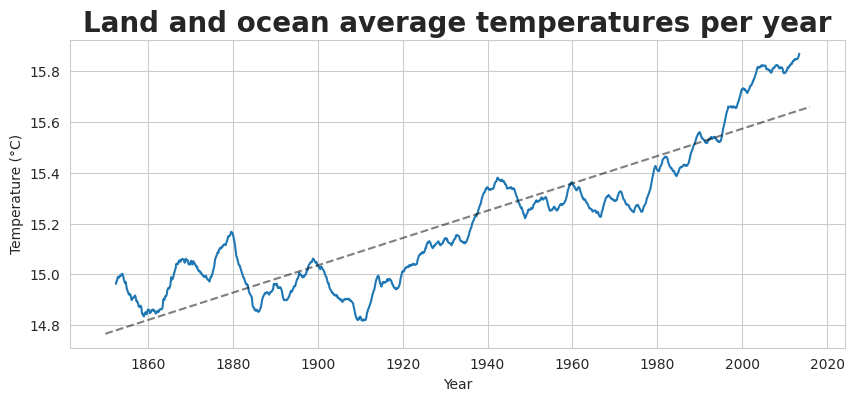

In [4]:
#Plot the filtered signal, get a line of best fit, and plot it aswell.
fig = plt.figure(figsize=(10, 4))
ax = plt.axes()
sns.lineplot(x=t_filter, y=f_filter, ax=ax) 
t_vec = avg_temperatures['dt']  # Use 'dt' column as x-values
coefficients = np.polyfit(range(len(t_vec)), avg_temperatures['LandAndOceanAverageTemperature'], 1)
regression_line = np.polyval(coefficients, range(len(t_vec)))
ax.plot(t_vec, regression_line, 'k--', alpha=0.5)
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Land and ocean average temperatures per year', font='Times new roman',weight='bold',size=20)
plt.show()


It is noticeable that starting around the 1980s, the temperature starts shooting up at an alarming pace. Truly, climate change is a serious issue, and any multi-year temperature analysis should take it into account, which should be considered in any multi-year temperature analysis. Climate change is a concrete phenomenon that is gradually altering the climate of our planet.

### Here comes el niño!
Regarding our dataset, it spans 2015-2016, years where the planet was living through the *El niño* phenomenom. This strange occurrence is only one part of a global climate cycle: the *El niño southern oscillation*, which in general, involves temperature cycles in the tropical pacific, which, by proxy, has world-wide effects. It consists of two parts, *El niño* (warmer temperatures), and *la niña* (colder temperatures). For the frequency of these events, I will again refer to the words of the National Ocenaographic and Atmospheric Administration: 'Episodes of El Niño and La Niña typically last nine to 12 months, but can sometimes last for years. El Niño and La Niña events occur every two to seven years, on average, but they don’t occur on a regular schedule. Generally, El Niño occurs more frequently than La Niña' (2010, paragraph 1). Normally, the effects of these cycles are benign, but, from time to time, there are very long and destructive *El niño*s , which came to be known as the super *El niño*s, which cause large hurricanes, droughts, famines, floods, among other effects. Such powerful abnormal phenomena ocurred in 1982-1983, 1997-1998, and 2015-2016, the last of which coincides with the time frame of our study, so it is very relevant to know the effects of these phenomena. And it does have an effect on societies aswell: according to D'Aleo, the damages of the great *El niño* of 1982-1983 added up to 14 billion dollars (2002, page 99). It is evident that it is vital to study these events in order to avoid their worst effects, and try to be ready for their occurrence .
<br>Going back to the topic of the 2015-2016 *El niño* , it was a very powerful climate event, which caused warmer waters in the pacific, among many other effects. For reference, lets observe the temperature changes around japan , site of our Iriomote dataset, during the worst moment of the *el niño* during november 2015 :
<br>
<img src="data_ass3/nino_2015.jpg" width="800"> 
(Stockdale *et. al*, 2017)

It can be observed that temperatures rised by around 1 to 1.5°C, which is certain to cause an effect over local coral reefs, so it is important to discern the effect of *el niño* during our analysis. Having done the background research, its time for:

### Data analysis time!

# Iriomote 2015-2017 data

The Iriomote datasets are on a strange .tab format, so the first thing I did was reading the data and cleaning it up a little bit:

In [5]:
#Made a function to read the files, store them in a dataframe, and then get the data to the right data-type. Ai helped a little bit on the data-reading department.
def read_weird_format(file_path):
    data = []
    with open(file_path) as tsv:
        for line in csv.reader(tsv, dialect="excel-tab"):
            data.append(line)
    data = pd.DataFrame(data[14::], columns=data[13])
    data["Date/Time"] = pd.to_datetime(data["Date/Time"])
    data["Temp [°C]"] = pd.to_numeric(data["Temp [°C]"], errors='coerce')
    return data

In [6]:
#Load the datasets!
depth_8=read_weird_format('data_ass3/sabasaki_1.tab')
depth_24=read_weird_format('data_ass3/sabasaki_2.tab')
depth_40=read_weird_format('data_ass3/sabasaki_3.tab')

First step is to plot the data, and I added the 23 and 29°C temperature thresholds mentioned before, to visualize how much the temperature surpassed the temperatures that are comfortable to coral reefs. 

Text(0.5, 0.04, '')

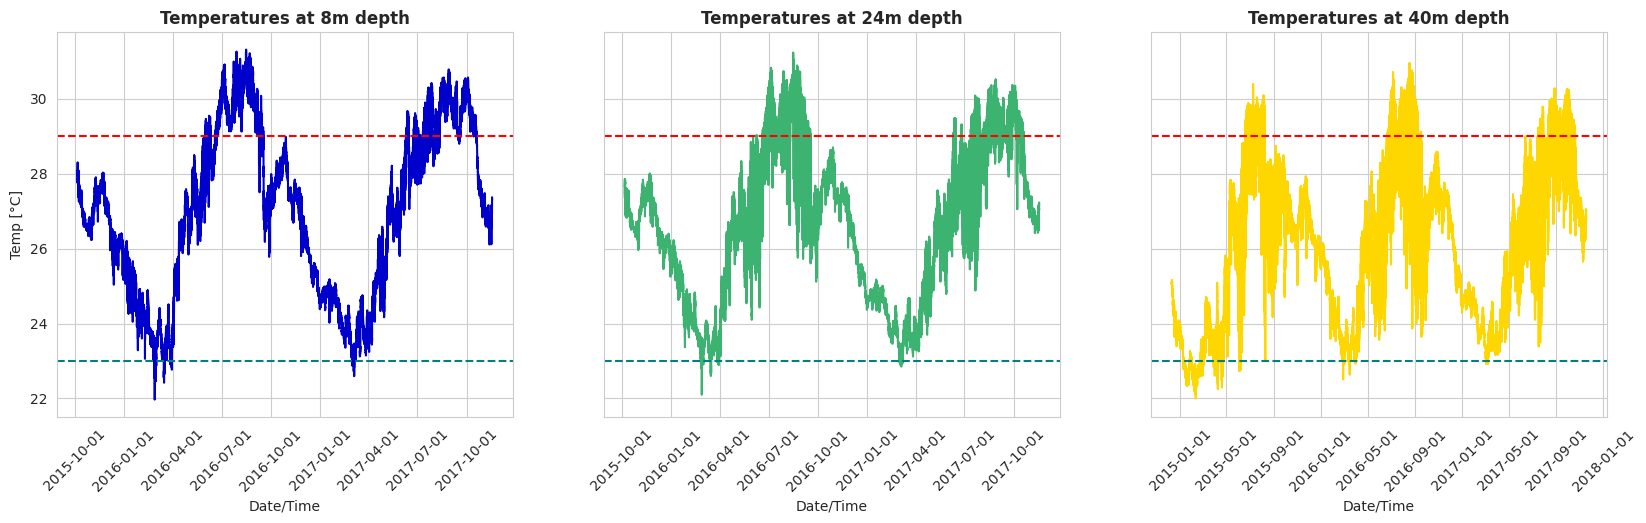

In [7]:
#Plot the data and add lines at y= 23 and y=29
datasets=(depth_8,depth_24,depth_40)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5),sharey=True)
colors=['mediumblue','mediumseagreen','gold']
depths=['8','24','40']
for dataset, ax, color, depth in zip(datasets, [ax1, ax2, ax3], colors, depths):
    sns.lineplot(ax=ax, data=dataset, x='Date/Time', y='Temp [°C]', color=color)
    ax.set_xticks(ax.get_xticks())
    #Ai helped with putting the x tick labels at an angle.
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_title('Temperatures at ' + depth + 'm depth', weight='bold')
    ax.axhline(y=29, color='red', linestyle='--')  # Horizontal line at y=29
    ax.axhline(y=23, color='teal', linestyle='--')  # Horizontal line at y=23
fig.text(0.5, 0.04, '', ha='center', fontsize=14)

Things are not looking good, coral is dying from heat and from cold! It is visible that both thresholds were broken , for entire months at a time even.

Nevertheless, I continued on by downsizing the data to  observation every hour, to make things easier for further analysis (and easier on my computer!).

In [8]:
#Ai helped with this: I split the date column to date and hour, and I get a mean value for every hour on a new dataframe,
#  and then I merge said date and hour columns on said new dataframe, getting a unique date value for each observation, needed for future plots
for depth, data in zip(depths, datasets):
    new_data = data.copy()
    new_data['Date'] = new_data['Date/Time'].dt.date
    new_data['Hour'] = new_data['Date/Time'].dt.hour
    grouped_data = new_data.groupby(['Date', 'Hour'])['Temp [°C]'].mean()
    grouped_data = grouped_data.reset_index()
    grouped_data['Time'] = pd.to_datetime(grouped_data['Date']) + pd.to_timedelta(grouped_data['Hour'], unit='H')
    new_dataset_name = 'new_depth_' + str(depth)
    globals()[new_dataset_name] = grouped_data

/tmp/ipykernel_28688/2114221401.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  grouped_data['Time'] = pd.to_datetime(grouped_data['Date']) + pd.to_timedelta(grouped_data['Hour'], unit='H')
/tmp/ipykernel_28688/2114221401.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  grouped_data['Time'] = pd.to_datetime(grouped_data['Date']) + pd.to_timedelta(grouped_data['Hour'], unit='H')
/tmp/ipykernel_28688/2114221401.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  grouped_data['Time'] = pd.to_datetime(grouped_data['Date']) + pd.to_timedelta(grouped_data['Hour'], unit='H')


### Trends

With this downsizing done, I proceed onwards to check for linear trends.

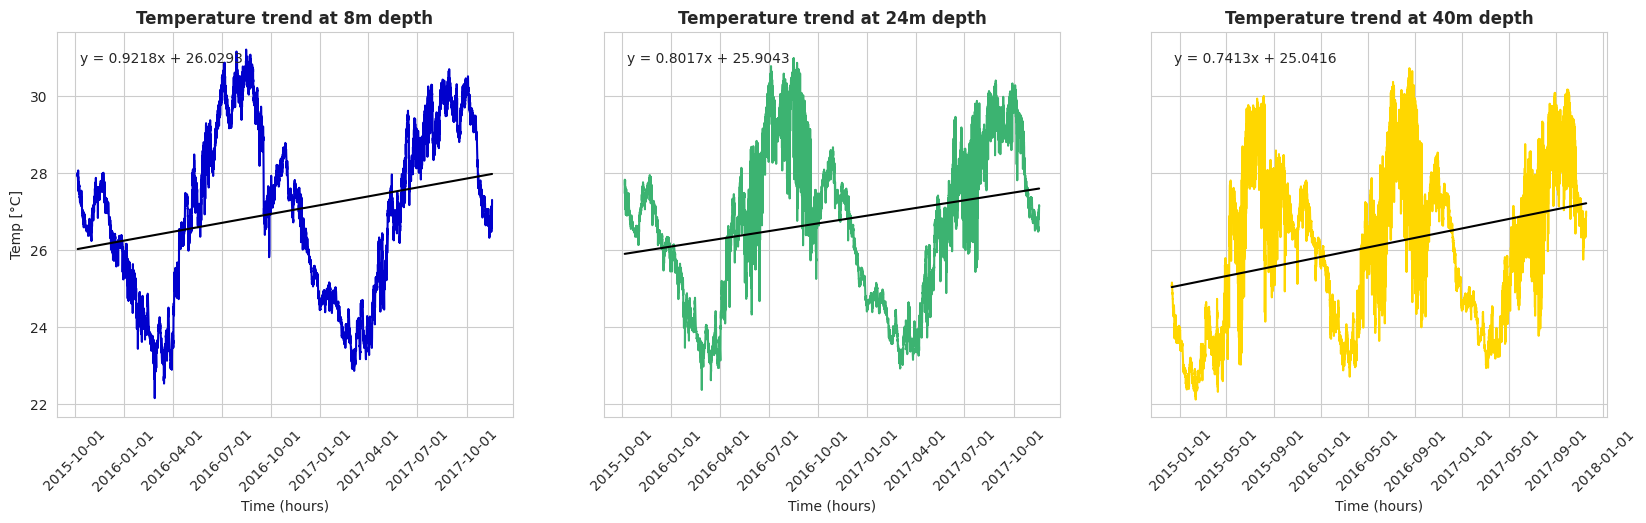

In [9]:
#Plotted the downsized dataset, got a line of best fit ,plotted it, and presented the equation obtained
new_datasets=[new_depth_8,new_depth_24,new_depth_40]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5),sharey=True)
for dataset, ax, color, depth in zip(new_datasets,[ax1, ax2, ax3],colors,depths):
    #Given the format given above to the dataset, I am getting a linear trend per hour
    time=range(0,len(dataset['Date']))
    sns.lineplot(ax=ax,x=dataset['Time'],y=dataset['Temp [°C]'],color=color)
    s, c, _, _, std_err = stats.linregress(time,dataset['Temp [°C]'] )
    line_of_best_fit = s * time + c
    #Multiply said hourly trend by 24 and 365 to get the yearly temperature trend
    equation_text = f'y = {s*24*365:.4f}x + {c:.4f}'
    ax.annotate(equation_text, xy=(0.05, 0.95), xycoords='axes fraction', 
    fontsize=10, ha='left', va='top')
    ax.plot(dataset['Time'], line_of_best_fit, color='black')
    ax.set_title('Temperature trend at '+depth+ 'm depth', weight='bold')
    ax.set_xlabel('Time (hours)')
    ax.set_xticks(ax.get_xticks()) 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  
    fig.text(0.5, 0.04, '', ha='center', fontsize=14)

All 3 depths present clear rising trends in these time frames, which indicates a strong effect from both climate change and the super *el niño* mentioned. Later on, we will compare this trend to the FOR01 site data, and observe the difference that the super *el niño* causes.



### Lag correlations
Next in line was lag correlations:

In [10]:
#A function for lag correlations, from one of this course's notebooks.
def custom_lag_corr(signal1, signal2, lag):
    if len(signal1) != len(signal2):
        raise Exception("array size not equal, cannot continue")
    if lag == 0:
        _, _, r, _, _ = stats.linregress(signal1, signal2)
    else:
        _, _, r, _, _ = stats.linregress(signal1[:-lag:], signal2[lag::])
    return r

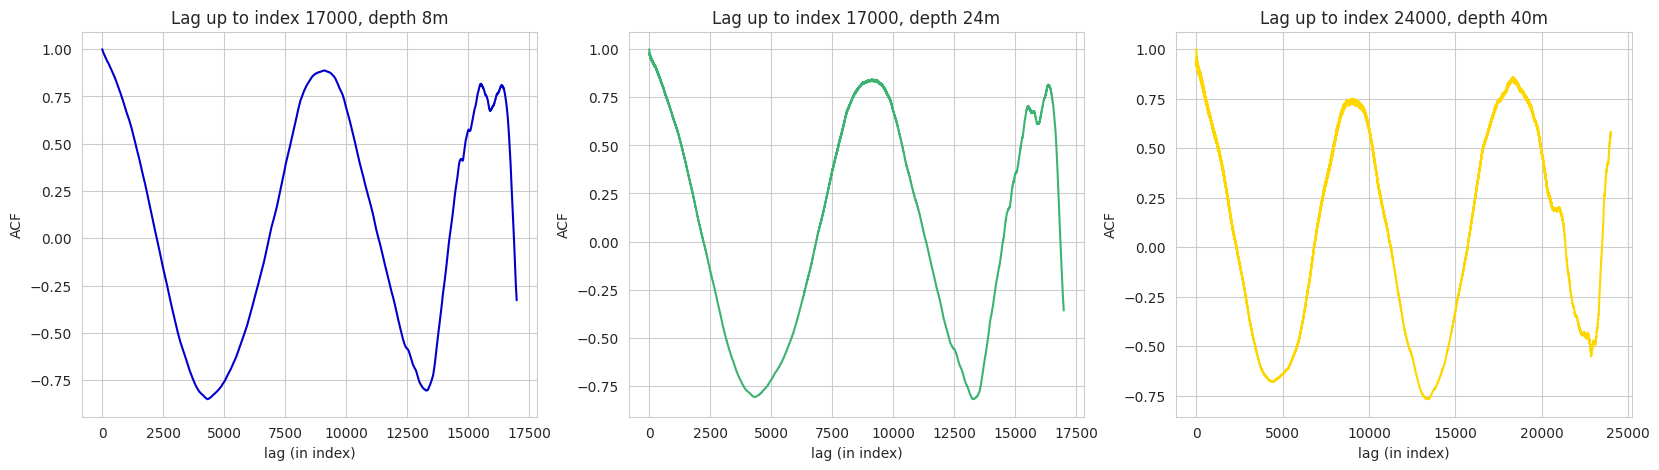

In [11]:
#Lag correlations were conducted on all depths.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
n=[17000,17000,24000]
for dataset, ax, color, depth,n in zip(new_datasets,[ax1, ax2, ax3],colors,depths,n):
    n = n
    r_lag = np.zeros(n)
    for lag in range(n):
        r_lag[lag] = custom_lag_corr(dataset['Temp [°C]'],dataset['Temp [°C]'], lag)
    ax.plot(np.arange(n), r_lag,color=color)
    ax.set_xlabel(r"lag (in index)")
    ax.set_ylabel(r"ACF")
    ax.set_title(f"Lag up to index {n}, depth {depth}m")

These figures indicate how 'periodic' each signal is, where a perfectly periodic wave signal would be a perfect wave, touching 1 and -1. However, toward the end of the graphs, the correlations stop being soft waves and start wandering around. This means that for the 15000 indexes, the data goes back and forth creating a somewhat periodic signal, however it ceases to be towards the end; since at the start of the original signal we are dealing with *el niño* in full swing, the correlations stopping at the end could signal the end of said event.



### Fourier transforms analysis
Next up, I'm doing fourier analysis on each of the signals, both on big picture scale (years wide signal), and up close and detailed (weekly analyis):

In [12]:
#Get a year and week column, to later on get insights into individual weeks.
for data in datasets:
    data['week'] = data['Date/Time'].dt.isocalendar().week
    data['year'] = data['Date/Time'].dt.isocalendar().year

Got the fourier transform and all its plots on a single function!

In [13]:
#Declared a function containing all the fourier transformation operations, which plots the original signals, wavenumbers, frequencies and periods.
#Also sets an annotation on the max value on the period graph.
def plot_fourier(dataset, color,depth):
    fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(18, 10))
    fig.suptitle('Fourier analysis, depth '+depth+'m', font='times new roman',size=20)
    f_h = np.fft.rfft(dataset['Temp [°C]'])        #Do the fast four transform.
    ax1.plot(dataset['Date/Time'], dataset['Temp [°C]'], color=color)
    ax1.set_xlabel(r"$t$")
    ax1.set_ylabel(r"$f$")
    ax1.set_title('Signal plot')
    k_vec = np.arange(len(f_h))     #wavenumber array.
    ax2.loglog(k_vec, abs(f_h[k_vec])**2, markersize=12, color=color)   ##Loglog graphs, normal ones aren´t very useful.
    ax2.set_xlabel(r"$k$")
    ax2.set_ylabel(r"$\hat{f}$")
    ax2.set_title('Wavenumber plot')

    t0 = dataset["Date/Time"].values[0]
    tf = dataset["Date/Time"].values[-1]
    L = (tf - t0) / np.timedelta64(1, 's') #Get the total lenght of time to scale the wavenumber array.
    L /= (24 * 3600) #Format it in days 
    scale_factor = 2.0 * np.pi / L 
    k_vec = np.arange(len(f_h), dtype=np.float64)
    k_vec[0] = np.nan
    k_mod = k_vec * scale_factor      # properly scaled wavenumber for the L.
    freq_vec = k_mod / (2.0 * np.pi)  # frequency from the scaled wavenumber.
    peri_vec = 2.0 * np.pi / k_mod    # period from the scaled wavenumber.
    ax3.loglog(freq_vec, abs(f_h)**2, color=color)
    ax3.set_xlabel(r"$\mathsf{f}\ (\mathrm{day}^{-1})$")
    ax3.set_ylabel(r"$|f_h|^2$")
    ax3.set_title('Frequency plot')
    ax4.loglog(peri_vec, abs(f_h)**2, color=color)
    ax4.set_xlabel(r"$T\ (\mathrm{days})$")
    ax4.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:g}'.format(x))) #Format x axis to normal format rather than scientific, AI lent a hand.
    ax4.set_title('Period plot')
    #Got the max value and annotated, AI helped, code was finicky, so I left a version that worked well.
    max_indices = np.argsort(abs(f_h)**2)[-2:]
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", message="posx and posy should be finite values")
        for index in max_indices:
            x = peri_vec[index]
            y = abs(f_h[index])**2
            with warnings.catch_warnings():
                warnings.filterwarnings("ignore", category=UserWarning)
                ax4.annotate(f"Max: {x:.2f}", xy=(x, y), xytext=(x, y), ha='center')

    plt.tight_layout()

Time to analyze the waves!

findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.


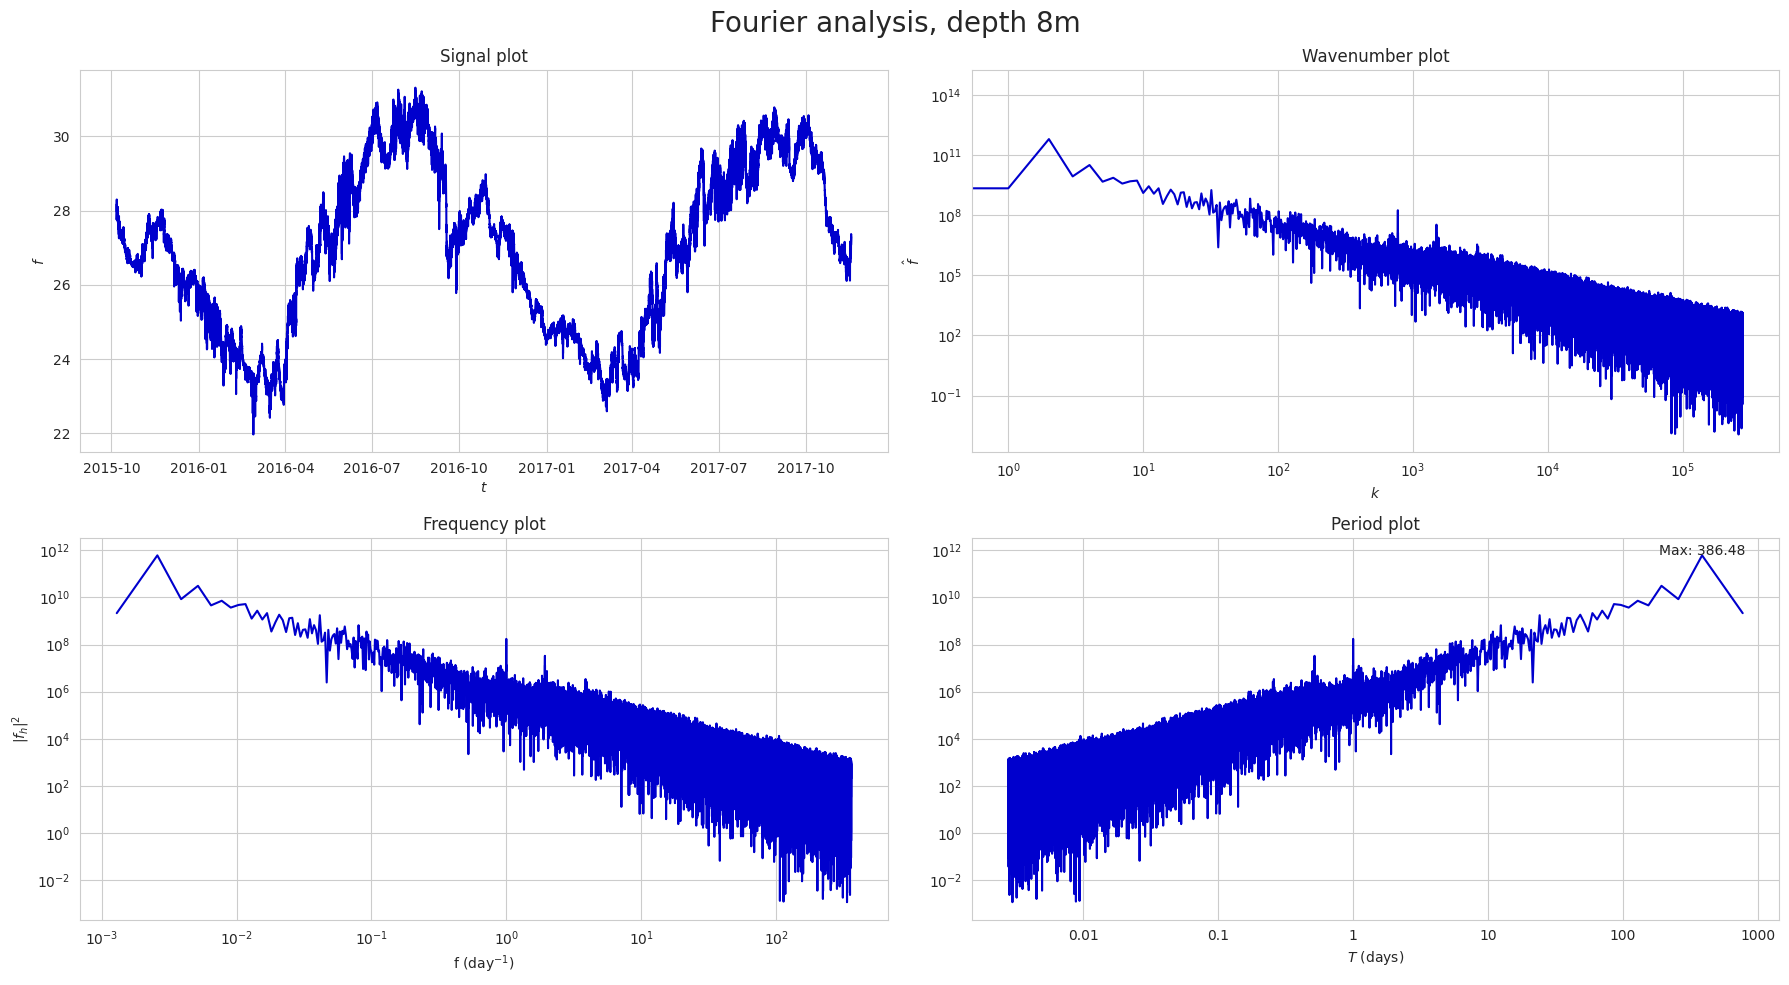

findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.


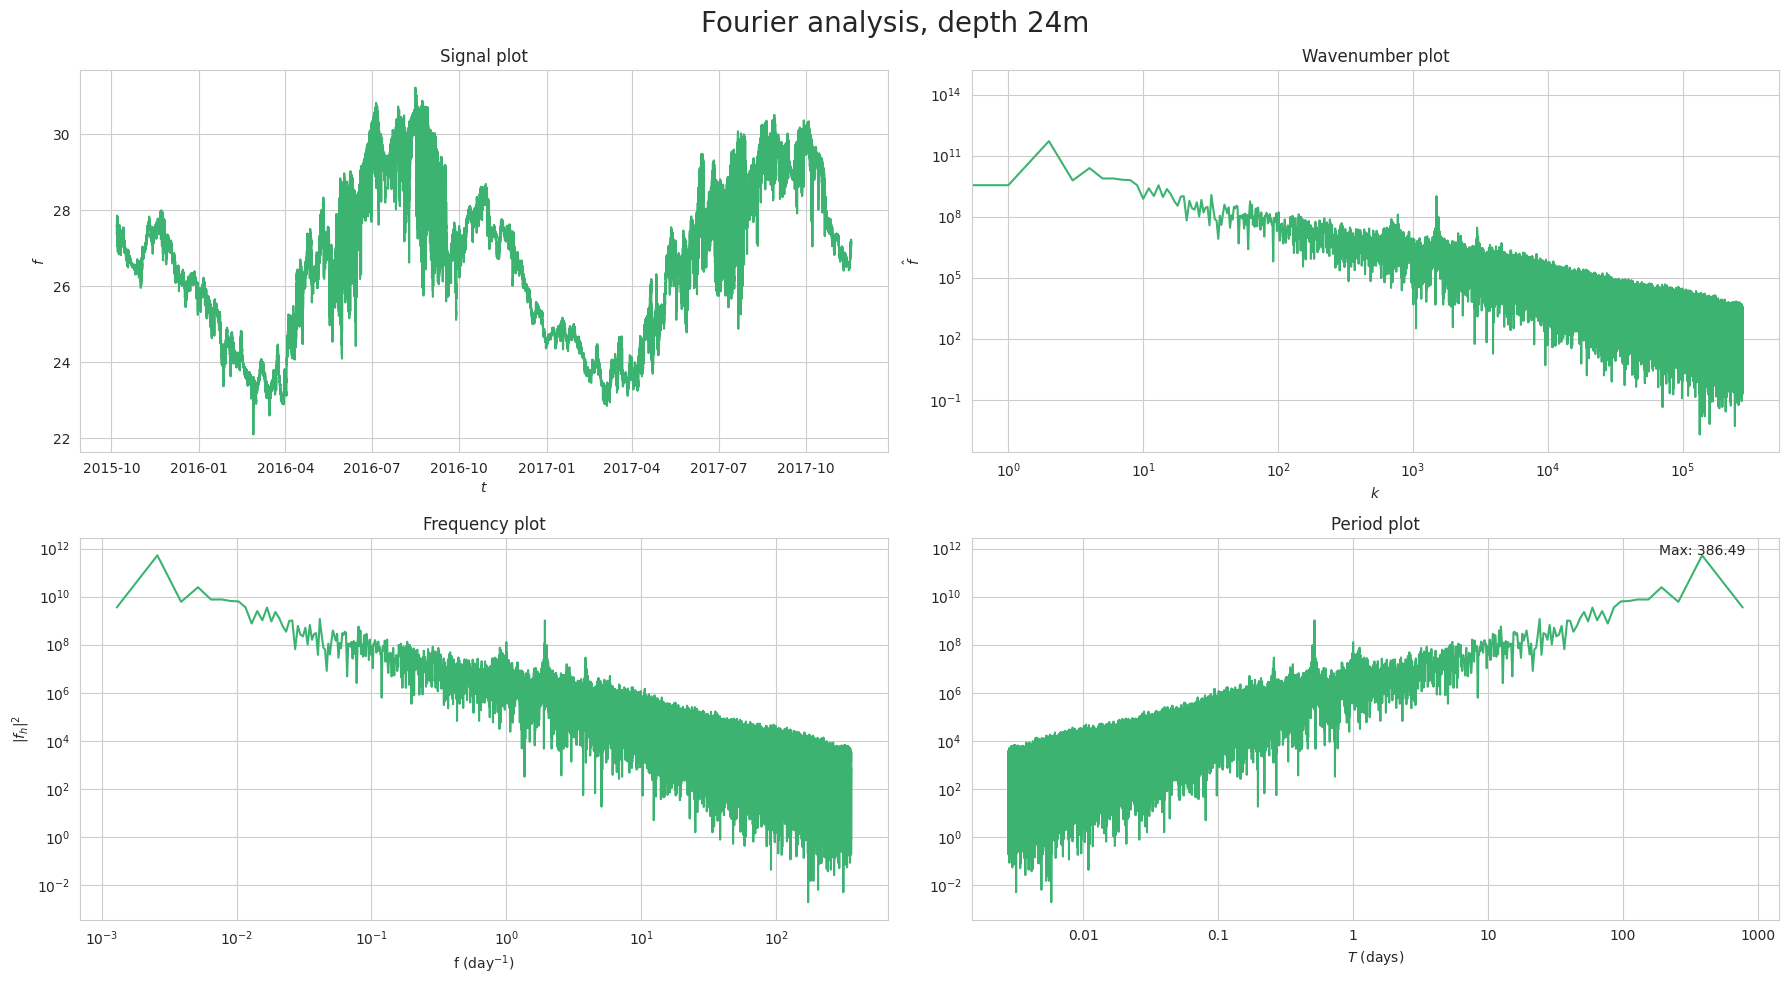

findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.


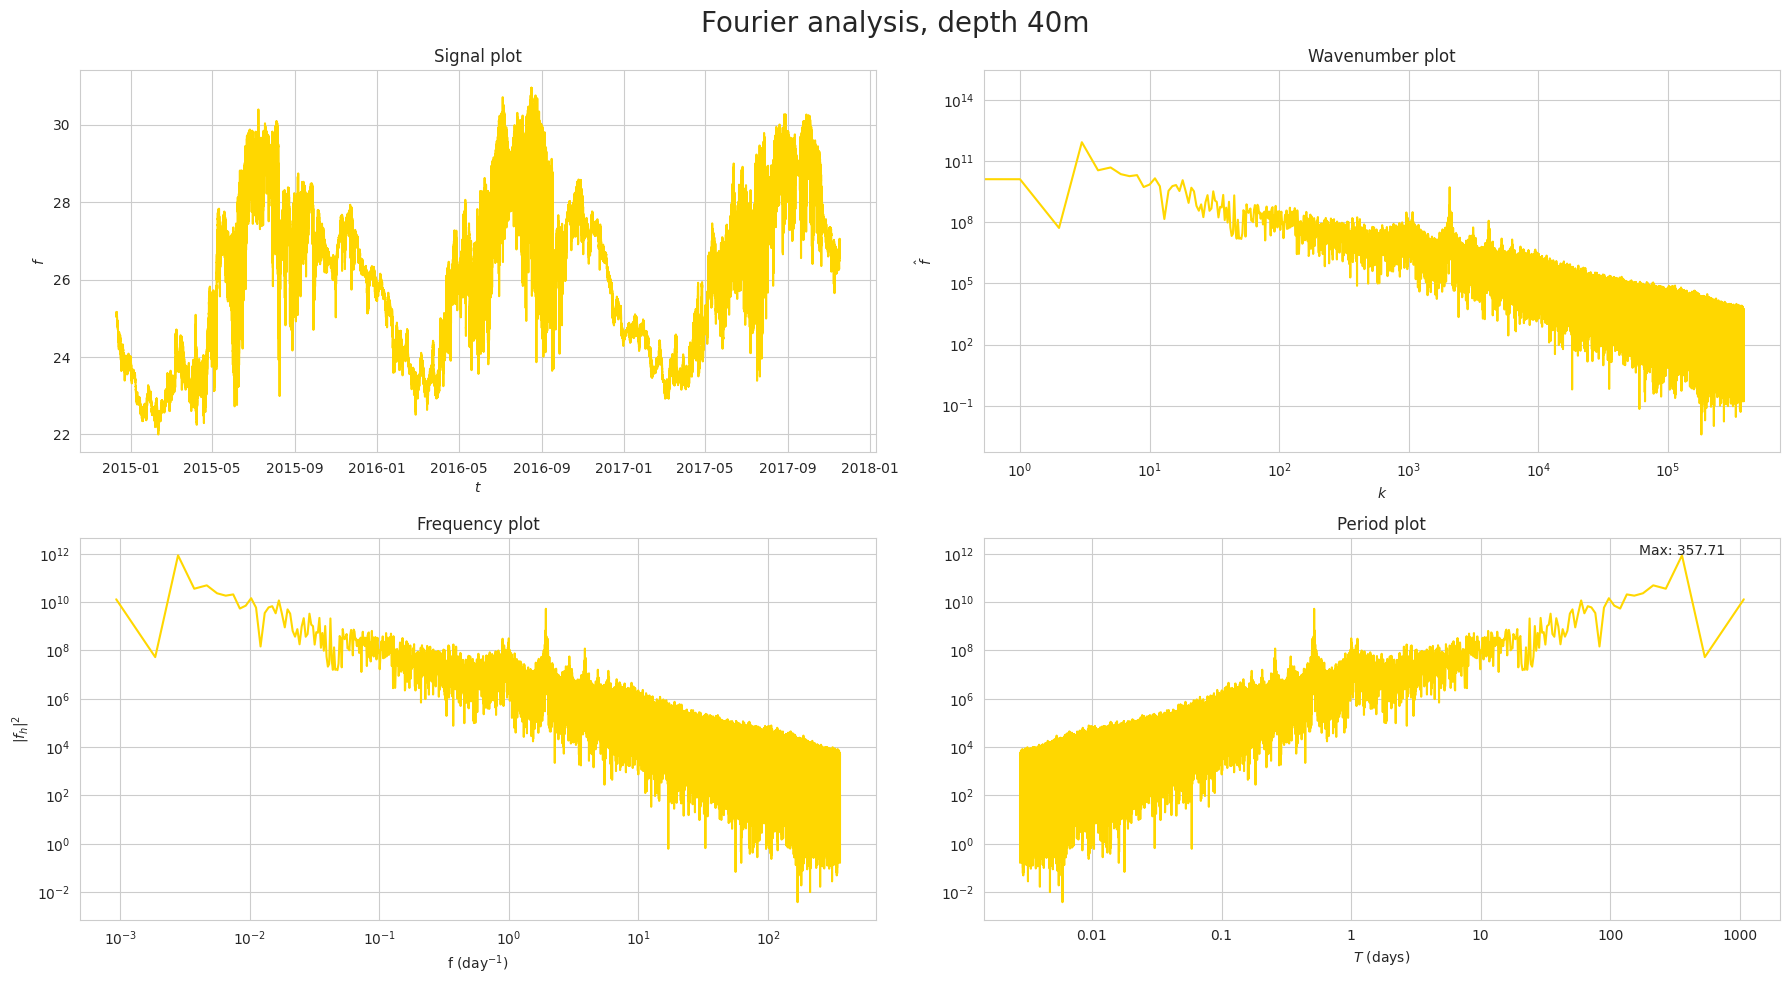

In [14]:
for data,color,depth in zip(datasets,colors,depths):
    plot_fourier(data,color,depth)

All 3 depth signals exhibit strongest waves at periods of around a year. This doesn´t match up with any of the regular tides mentioned above, could these yearly waves indicate el niño/climate change effects? Evidence for this is that both are years wide phenomena, and the depth = 40 m period graph even shows the squared magnitude going back up at the period = 1000 days mark, which is around every 3 years, roughly matching up with expected *el niño* occurrences. Apart from that the period graphs show local peaks around the semidiurnal and diurnal marks, matching up with the expected daily tides. 

## Weekly analysis

Next I got data for a single week in the middle of 2016, around these times temperatures were highest.

In [15]:
for depth, data in zip(depths, datasets):
    new_dataset_name = 'filtered_' + depth
    globals()[new_dataset_name] = data[(data['week'] == 27) & (data['year'] == 2016)]

And I performed Fourier transform analysis on them:

findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.


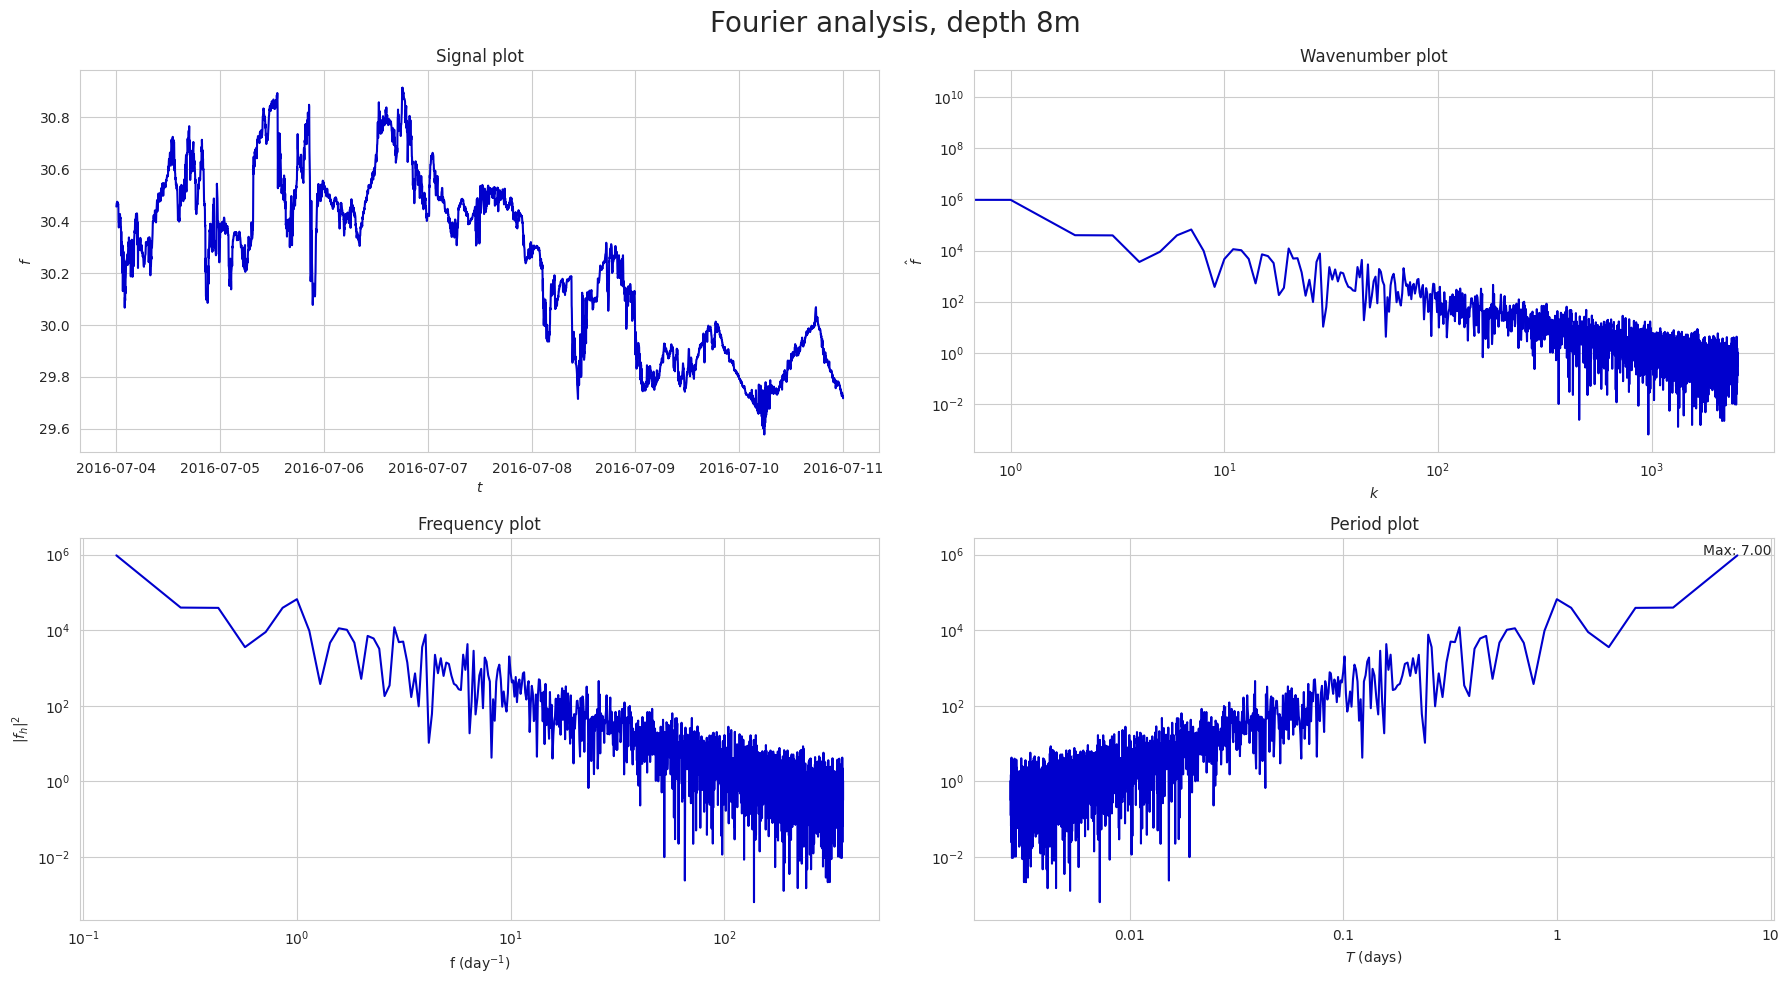

findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.


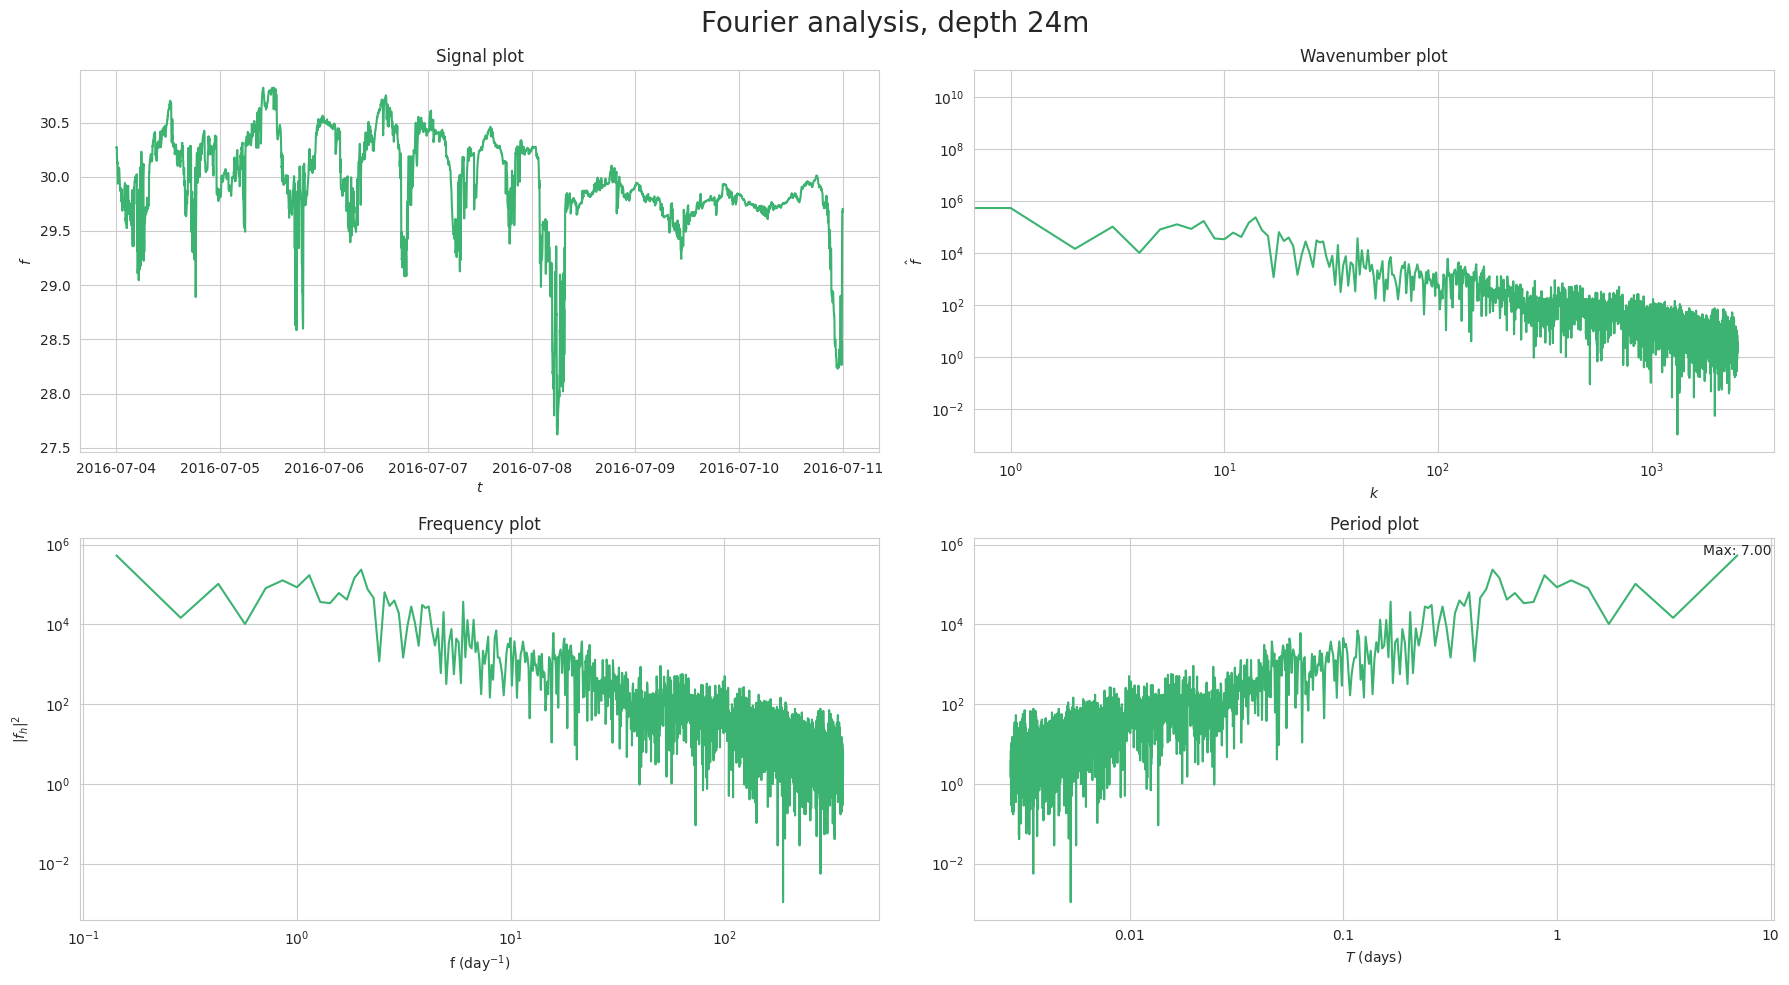

findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.


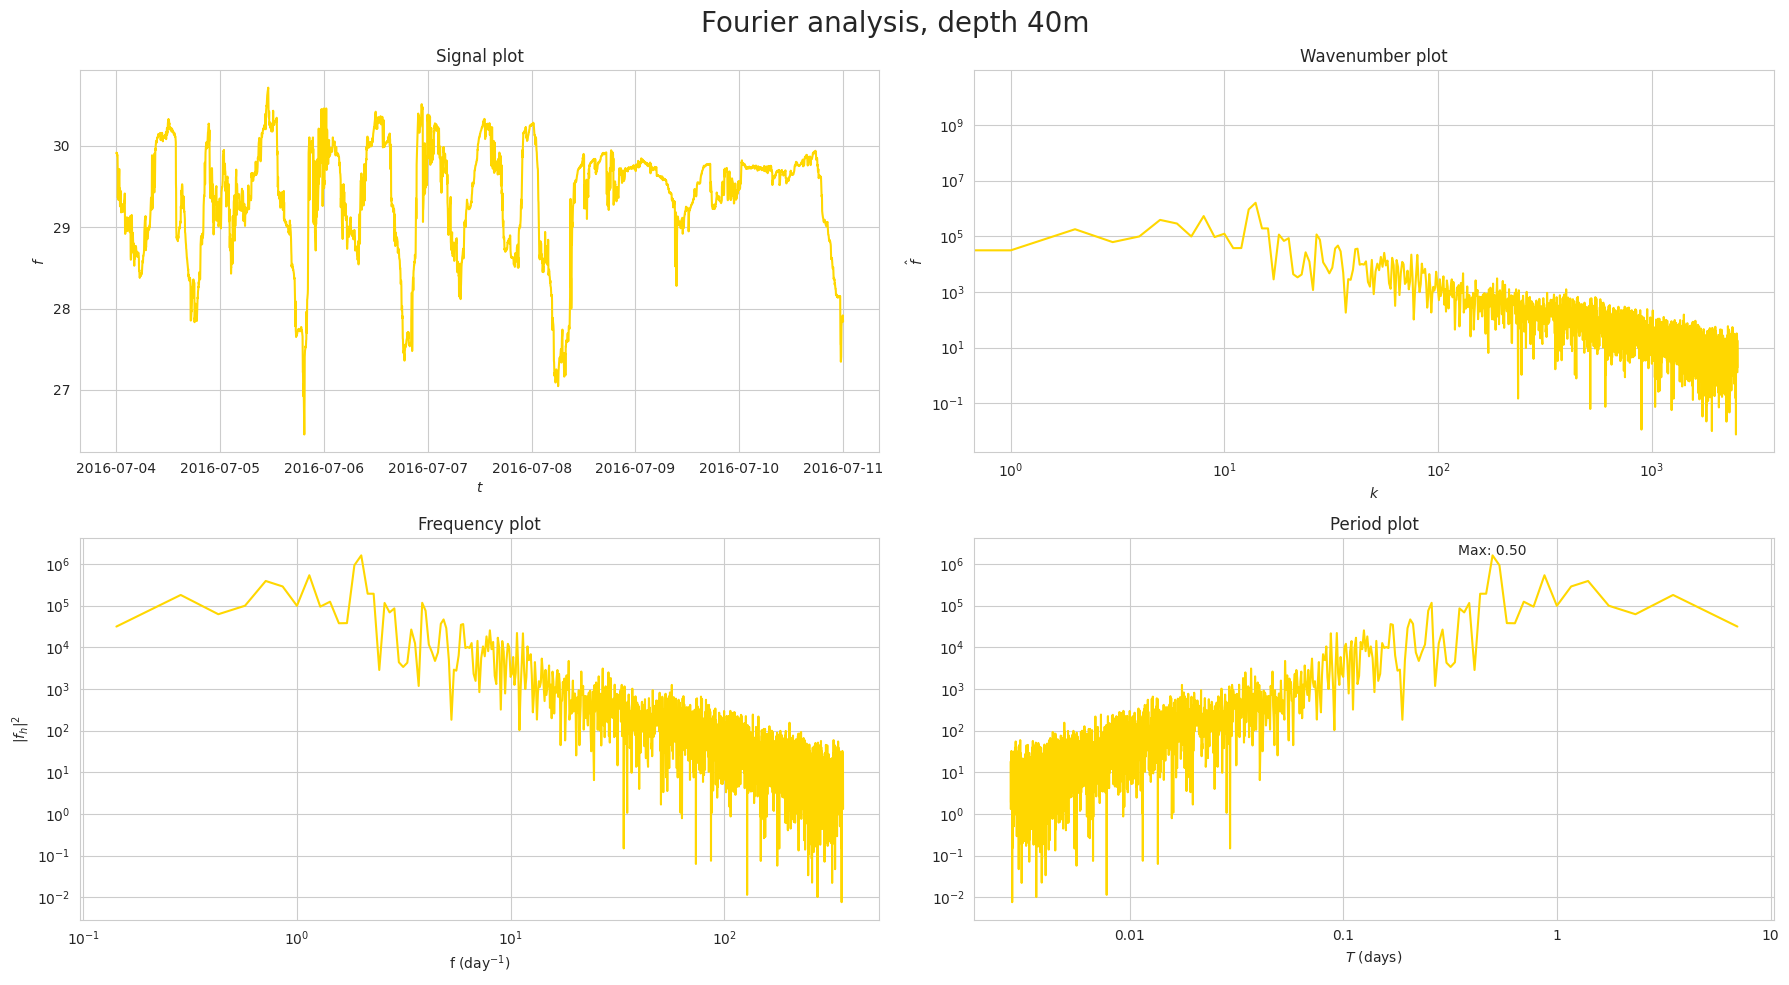

In [16]:
filtered_dfs=[filtered_8,filtered_24,filtered_40]
for data,color,depth in zip(filtered_dfs,colors,depths):
    plot_fourier(data,color,depth)

This time the tides are more apparent, on all three depths semi-diurnal tides are somewhat visible, and neap and spring tides are prevalent (weekly), and on 8m depth the diurnal tide is sharply visible. 

Afterwards, I detrended the signals to detect what lies outside of said trends, and see what tides are visible outside of the trend set by the *el niño*/climate change combo.

In [17]:
#Made a function that includes the detrending and then sends the result to Fourier transformation analysis.
def detrender(data,color,depth):
    time = range(0, len(data['Date']))
    coefficients = np.polyfit(time, data['Temp [°C]'], 1)
    trend = np.polyval(coefficients, time)
    # Detrend the original signal by subtracting the trend component.
    detrended_signal = data['Temp [°C]'] - trend
    detrended = pd.DataFrame()
    detrended['Date/Time'] = pd.to_datetime(data['Date'])
    detrended['Temp [°C]'] = detrended_signal
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(detrended['Date/Time'], detrended['Temp [°C]'],color=color)
    ax.set_title('Absolute anomalies, depth ' + str(depth)+'m')
    plt.xlabel("Time")
    plt.ylabel("Temperature")                                        
    max_index = (abs(detrended['Temp [°C]']).idxmax())  # Find the index and value of the biggest anomaly point
    max_index_x=max_index+500
    max_value = detrended['Temp [°C]'][max_index]
    # Annotate the point on the plot.
    ax.annotate(f'Biggest anomaly: {max_value:.2f}', xy=(detrended['Date/Time'][max_index_x], detrended['Temp [°C]'][max_index]),
                xytext=(detrended['Date/Time'][max_index_x],detrended['Temp [°C]'][max_index] ))
    ax.axhline(y=0, color='black', linestyle='--') 
    plt.show()
    plot_fourier(detrended,color,depth)

And applied said function to the hourly datasets (1 hour= 1 observation makes linear regression easier).

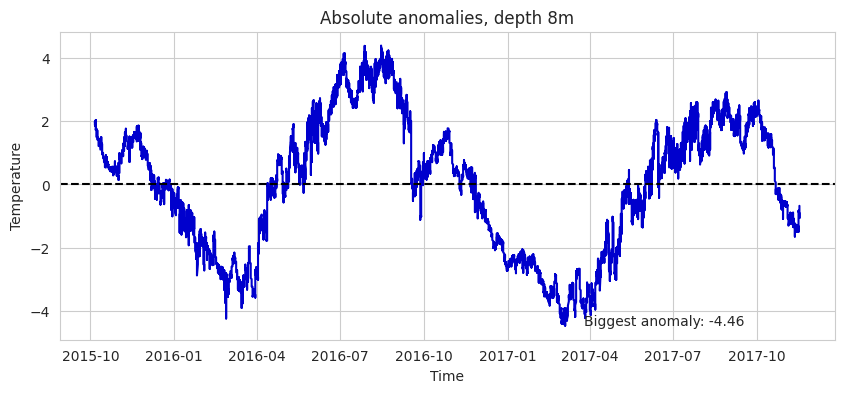

findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.


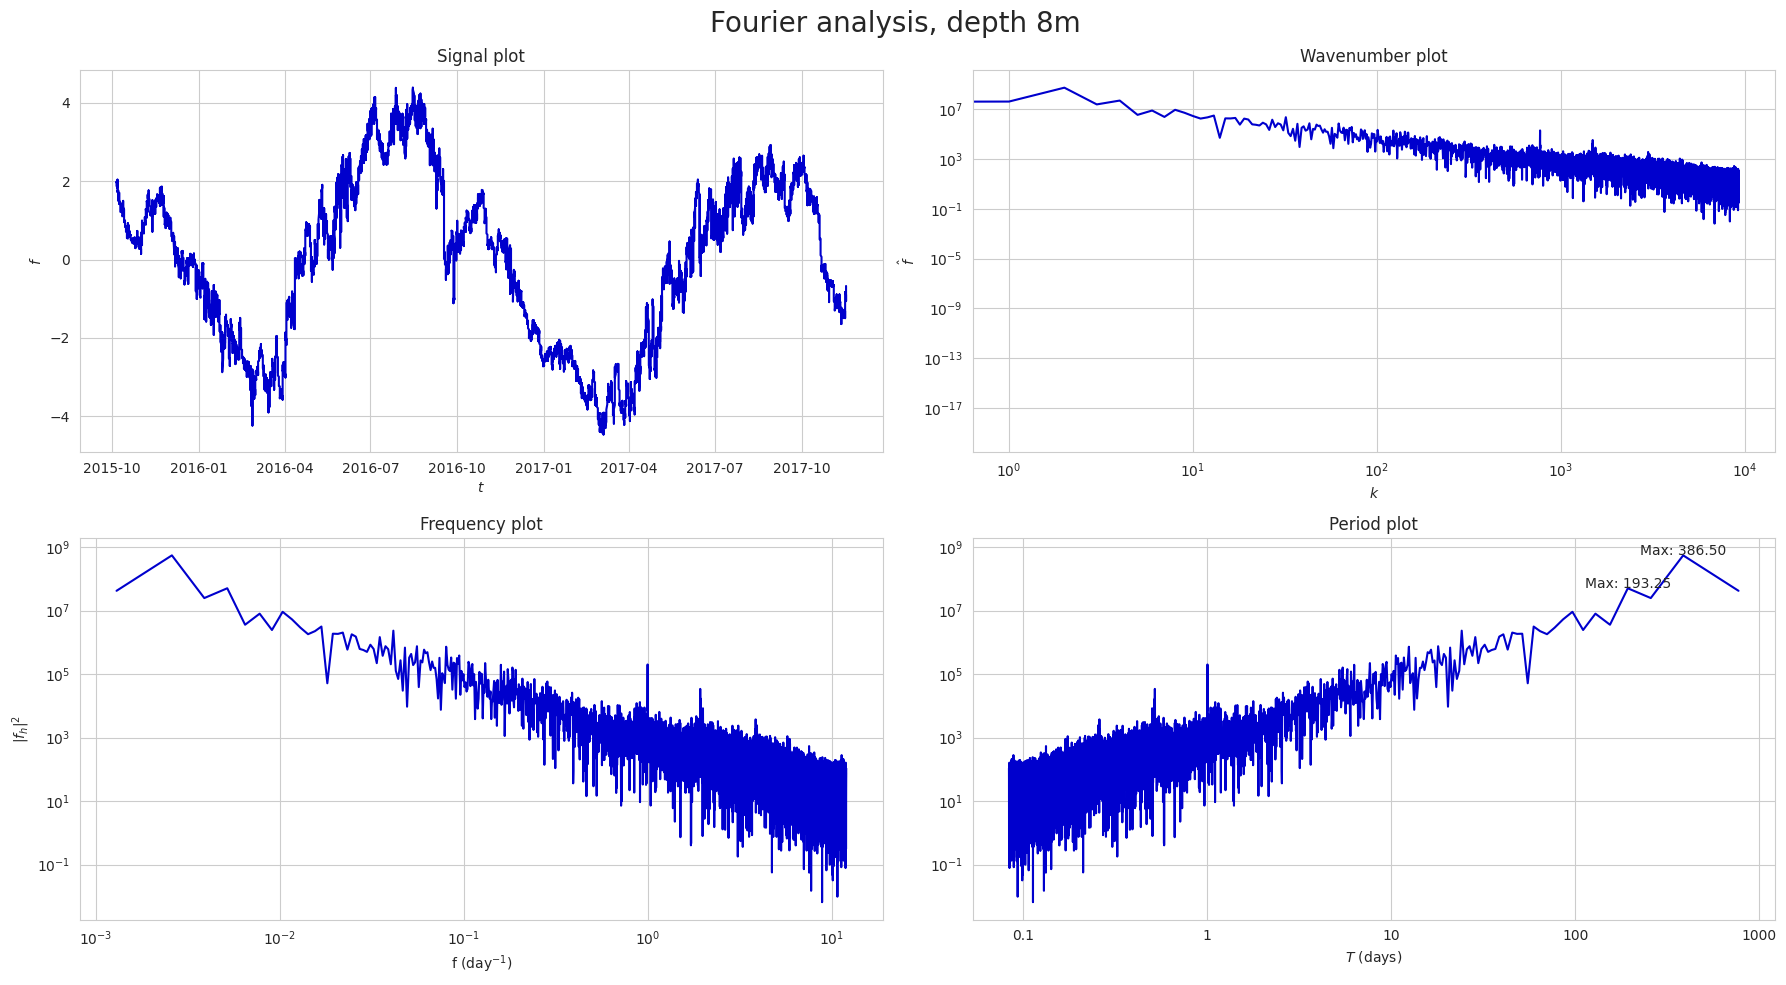

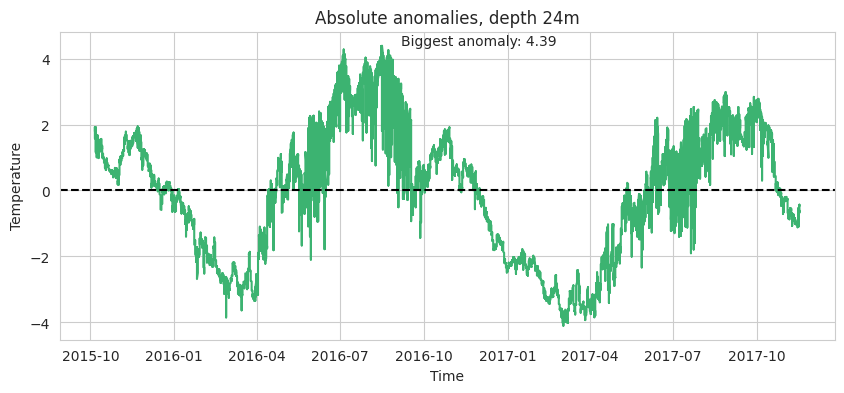

findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.


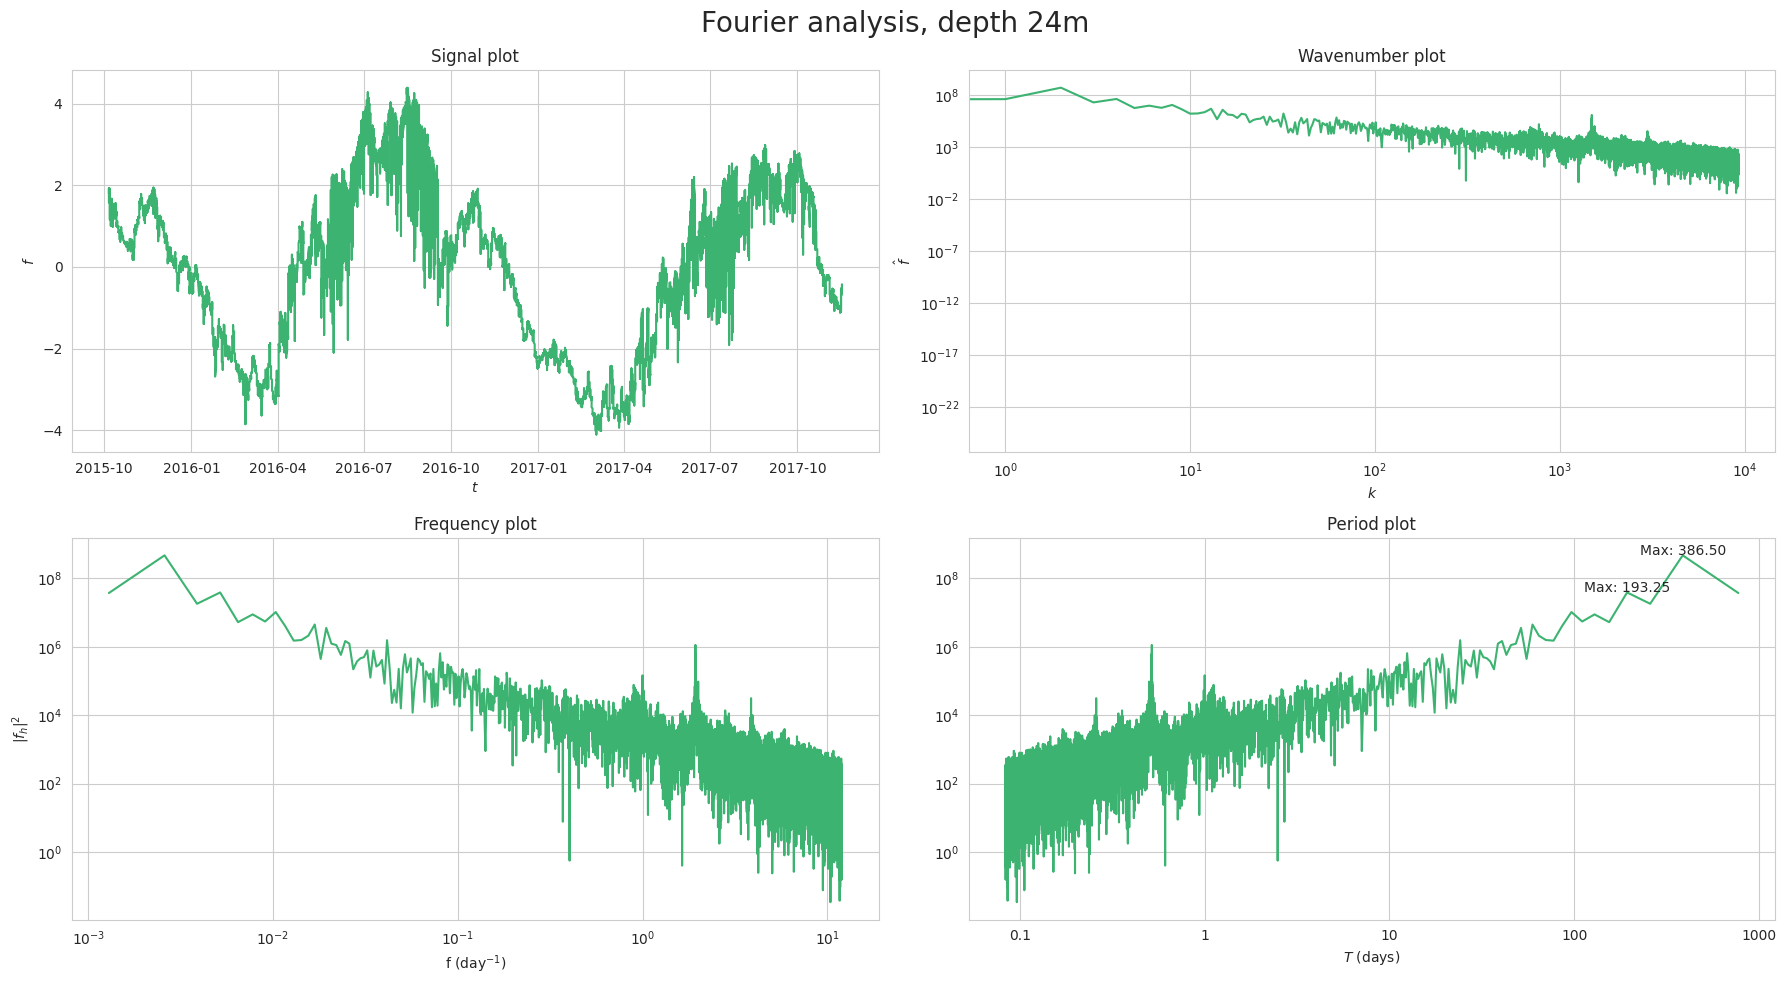

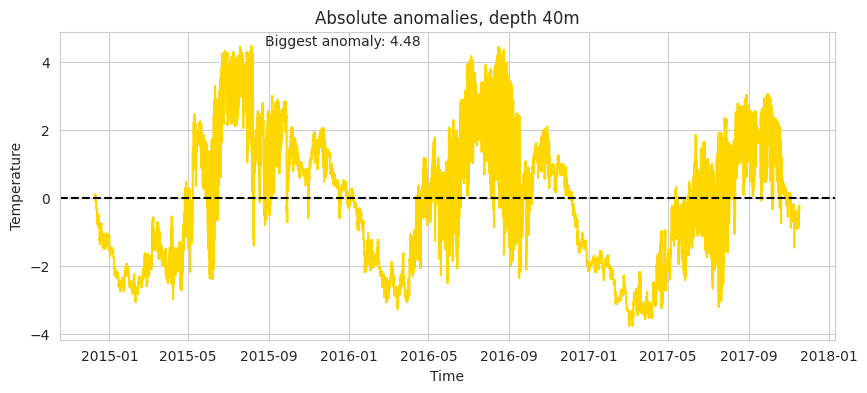

findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.


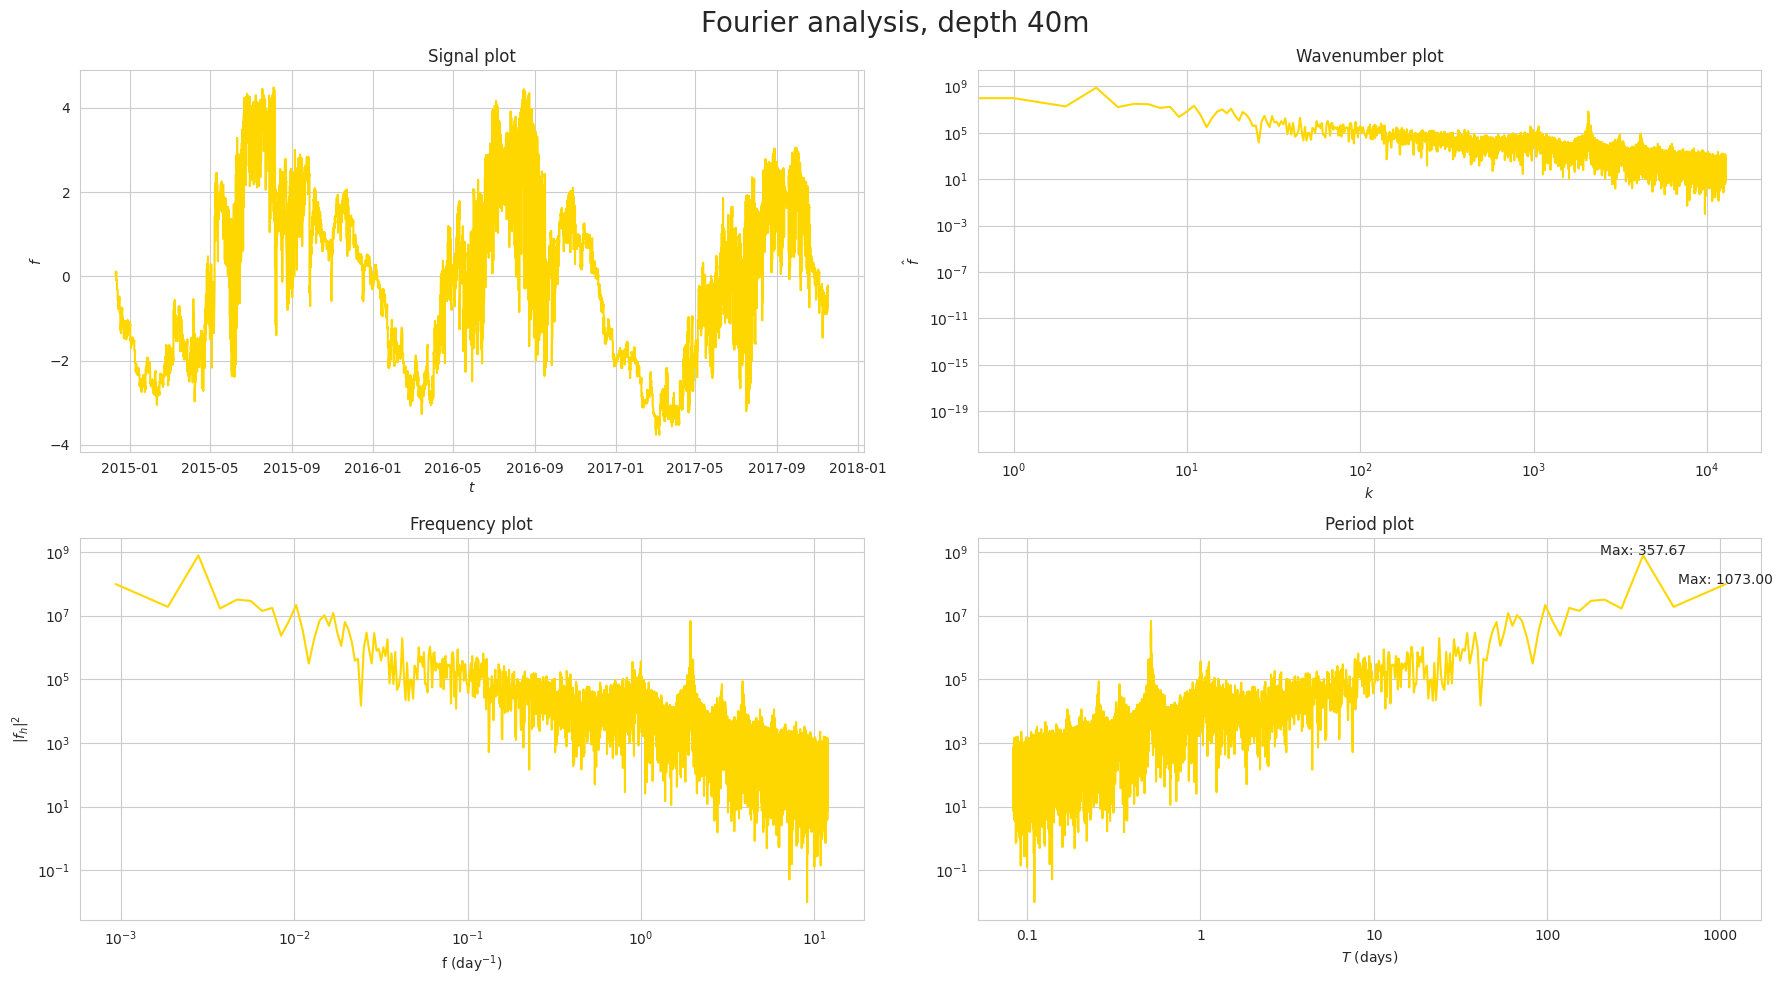

In [18]:
for data,color,depth in zip (new_datasets,colors,depths): 
    detrender(data,color,depth)

It is interesting that all 3 depths showed anomalies in different years, 8m depth in 2017 after the end of the *el niño*, with a sharp drop in temperature. Meanwhile 24m & 40m did during said event. Perhaps the reason could be the stratification of the ocean;photic zones near the surface always receive a lot of heat, they are always hot, while more benthic zones are always very cold, so those layers of the ocean are always ready to absorb sudden heat outbursts like in *el niño*, even surpassing the trends and showing up as anomalies.
The Fourier analysis backs this up, showing strong yearly waves everywhere, and shows the bottom of the ocean is more affected by *el niño* events (wave every 1000 days), even outside the trend shown. 8m & 24m analysis also shows solar semi-annual tides. Moreover, the yearly waves show up, but with lesser squared magnitudes, meaning that outside of the climate change/*el niño* trends, yearly waves have less effect on temperature.

## Filtering frequencies/periods
Now it´s time to filter the signal, eliminating long period signals (1 year or more), since we know they come from the effects of a super *el niño* and climate change:

In [19]:
#Similar function to the past one, it "silences" desired frequencies/periods though.
def plot_fourier_mod(dataset, color,depth, period):
    fig, ax = plt.subplots(figsize=(10, 4))
    f_h = np.fft.rfft(dataset['Temp [°C]'])
    t0 = dataset["Date/Time"].values[0]
    tf = dataset["Date/Time"].values[-1]
    L = (tf - t0) / np.timedelta64(1, 's')
    L /= (24 * 3600)
    scale_factor = 2.0 * np.pi / L
    k_vec = np.arange(len(f_h), dtype=np.float64)
    k_vec[0] = np.nan
    k_mod = k_vec * scale_factor     
    freq_vec = k_mod / (2.0 * np.pi)  
    peri_vec = 2.0 * np.pi / k_mod    
    f_h_mod = copy.deepcopy(f_h)               
    f_h_mod[peri_vec >= period] = 0          # set anything above the desired period to 0.
    f_mod = np.fft.irfft(f_h_mod)       #reverse the Fourier transform.
    time_trimmed = dataset['Date/Time'][:len(f_mod)]  #Set the time the same size as the modified signal.
    sns.lineplot(ax=ax,x=time_trimmed,y=f_mod,color=color)  
    ax.axhline(y=29, color='red', linestyle='--')  # Horizontal line at y=29.
    ax.axhline(y=23, color='teal', linestyle='--')  # Horizontal line at y=23.

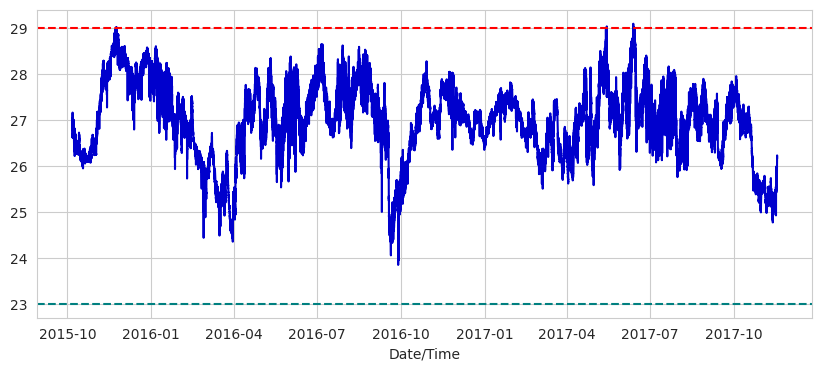

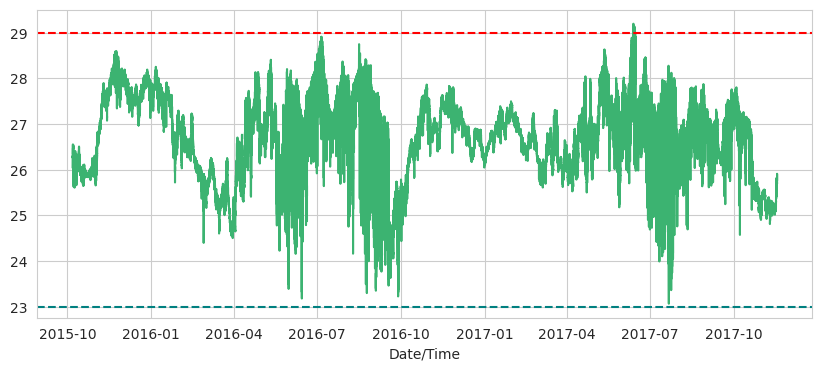

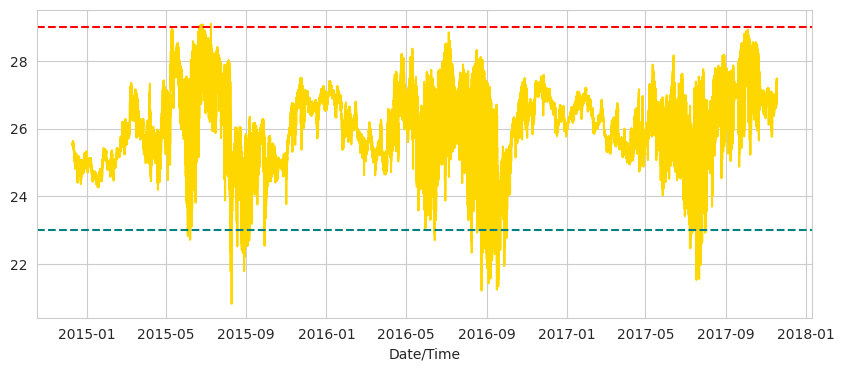

In [20]:
for data,color in zip(datasets,colors):
        plot_fourier_mod(data,color,8,300)

Therefore, we can conclude here that climate change and super *el niño*s combine to do extensive damage to coral reefs by rising the temperatures to levels that bleach them, as without these events, the temperatures would be within acceptable boundaries. This also shows the vital role regular internal tides play in downsizing the effect of these phenomena, keeping temperatures in check and ecosystems in balance. 

# FOR01 site 2011-2013 data
Next on the menu is analysing the data provided Washburn, L. from the FOR01 site in French Polynesia, a site also in the Pacific, whose latitude is closer to the equator, and in a time free from extreme events like the 2015-2016 super *el niño*, if there´s *niño*s at all, they will be normal ones. This analysis will provide a valuable comparison, helping denote how extreme were the conditions in 2015-2016. The analysis performed will be very similar:

In [21]:
#Preprocessed and limited the data to 2011-2013 (time frame with complete data in multiple depths) in order to be able to upload it to GitHub.
FOR01 = pd.read_csv('data_ass3/FOR01.csv', delimiter = ',')
FOR01['Date/Time']=pd.to_datetime(FOR01['Date/Time'])

In [22]:
depths=['8','14','16']
for depth in depths:
    new_dataset_name = 'FOR01_' + str(depth)
    globals()[new_dataset_name] = FOR01[FOR01['depth_m'] == int(depth)]

Text(0.5, 0.04, '')

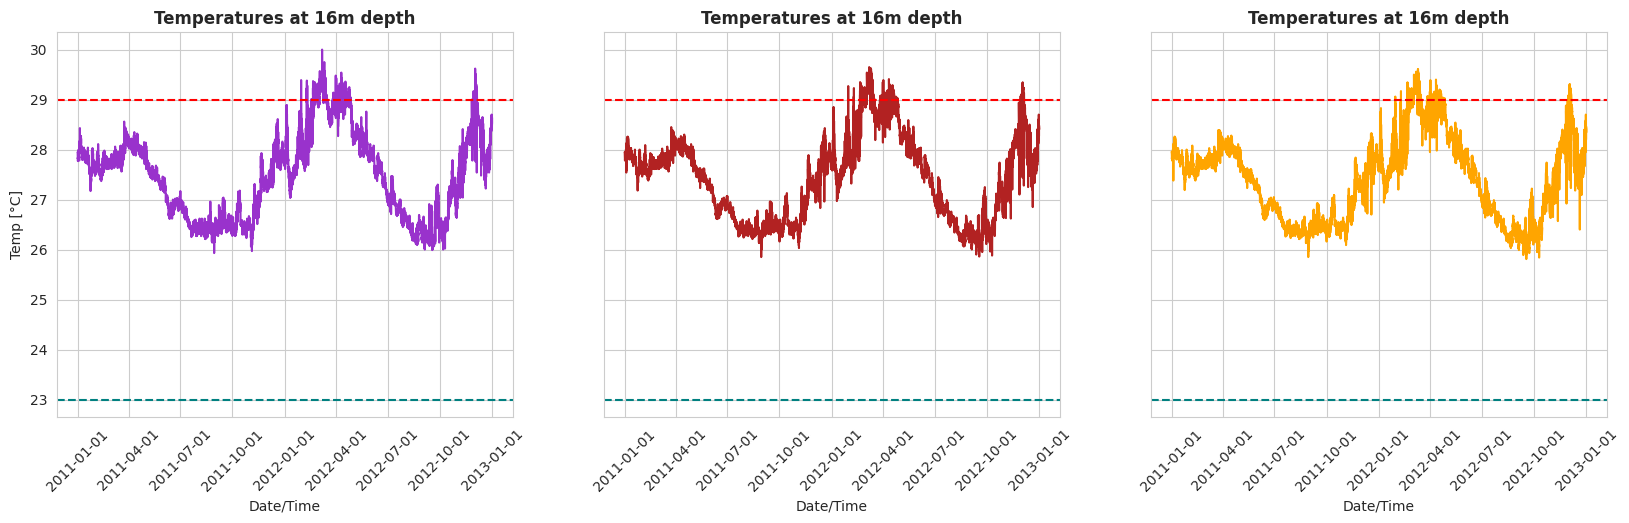

In [23]:
datasets=[FOR01_8,FOR01_14,FOR01_16]
colors=['darkorchid','firebrick','orange']
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5),sharey=True)
for dataset, ax,color in zip (datasets,[ax1,ax2,ax3],colors):
    sns.lineplot(ax=ax,x=dataset['Date/Time'],y=dataset['Temp [°C]'],color=color)
    ax.set_xticks(ax.get_xticks()) 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  
    ax.set_title('Temperatures at '+str(depth)+ 'm depth', weight='bold')
    ax.axhline(y=29, color='red', linestyle='--')  # Horizontal line at y=29
    ax.axhline(y=23, color='teal', linestyle='--')  # Horizontal line at y=23
fig.text(0.5, 0.04, '', ha='center', fontsize=14)

Note how the temperature stays mostly within the desired temperature boundaries, allowing coral reefs to flourish.

In [24]:
for depth, data in zip(depths, datasets):
    new_data = data.copy()
    new_data['Date'] = new_data['Date/Time'].dt.date
    new_data['Hour'] = new_data['Date/Time'].dt.hour
    grouped_data = new_data.groupby(['Date', 'Hour'])['Temp [°C]'].mean()
    grouped_data = grouped_data.reset_index()
    grouped_data['Time'] = pd.to_datetime(grouped_data['Date']) + pd.to_timedelta(grouped_data['Hour'], unit='H')
    new_dataset_name = 'new_FOR01_' + str(depth)
    globals()[new_dataset_name] = grouped_data

/tmp/ipykernel_28688/195428222.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  grouped_data['Time'] = pd.to_datetime(grouped_data['Date']) + pd.to_timedelta(grouped_data['Hour'], unit='H')
/tmp/ipykernel_28688/195428222.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  grouped_data['Time'] = pd.to_datetime(grouped_data['Date']) + pd.to_timedelta(grouped_data['Hour'], unit='H')
/tmp/ipykernel_28688/195428222.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  grouped_data['Time'] = pd.to_datetime(grouped_data['Date']) + pd.to_timedelta(grouped_data['Hour'], unit='H')


In [25]:
new_datasets=[new_FOR01_8,new_FOR01_14,new_FOR01_16]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5),sharey=True)
for dataset, ax, color, depth in zip(new_datasets,[ax1, ax2, ax3],colors,depths):
    time=range(0,len(dataset['Date']))
    sns.lineplot(ax=ax,x=dataset['Time'],y=dataset['Temp [°C]'],color=color)
    s, c, _, _, std_err = stats.linregress(time,dataset['Temp [°C]'] )
    line_of_best_fit = s * time + c
    equation_text = f'y = {s*24*365:.4f}x + {c:.4f}'
    ax.annotate(equation_text, xy=(0.05, 0.95), xycoords='axes fraction', 
    fontsize=10, ha='left', va='top')
    ax.plot(dataset['Time'], line_of_best_fit, color='black')
    ax.set_title('Temperature trend at '+depth+ 'm depth', weight='bold')
    ax.set_xlabel('Time (hours)')
    ax.set_xticks(ax.get_xticks()) 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  
    fig.text(0.5, 0.04, '', ha='center', fontsize=14)

The trends are also noticeably smaller, because while the super *el niño* is absent here, climate change is still a force in action.

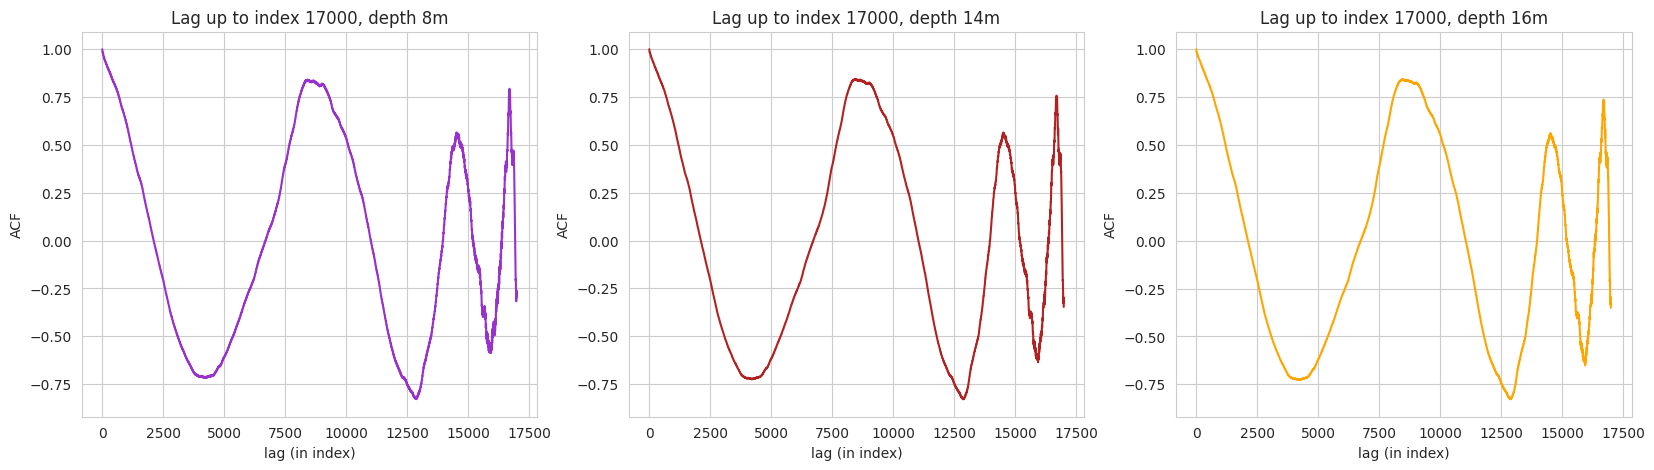

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
for dataset, ax, color, depth in zip(new_datasets,[ax1, ax2, ax3],colors,depths):
    n = 17000
    r_lag = np.zeros(n)
    for lag in range(n):
        r_lag[lag] = custom_lag_corr(dataset['Temp [°C]'],dataset['Temp [°C]'], lag)
    ax.plot(np.arange(n), r_lag,color=color)
    ax.set_xlabel(r"lag (in index)")
    ax.set_ylabel(r"ACF")
    ax.set_title(f"Lag up to index {n}, depth {depth}m")

Correlations are all over the place, this means that the wave isn´t repeating itself reliably, meaning its a lot more unstable. It makes sense, as it is another patch of ocean, maybe subject to more random forces, changing the waves, and we must not forget there could be another *el niño* in there, but a smaller one. Here correlations not jumping from 1 to -1 doesn´t mean anything concretely, it just means the signal is not repeating itself very much, or at least not repeating exactly.

In [27]:
for depth, data in zip(depths, datasets):
    new_dataset_name = 'filtered_' + str(depth)
    globals()[new_dataset_name] = data[(data['week'] == 16) & (data['year'] == 2012)]

In [28]:
for data,color,depth in zip(datasets,colors,depths):
    plot_fourier(data,color,depth)

findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.


findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.


findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.


Yearly waves are once again kings,but their squared magnitude is lower, meaning their influence is not as big, so we can conclude that in 2015-2016, the super *el niño* also could have affected the yearly waves, making them stronger.

findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.


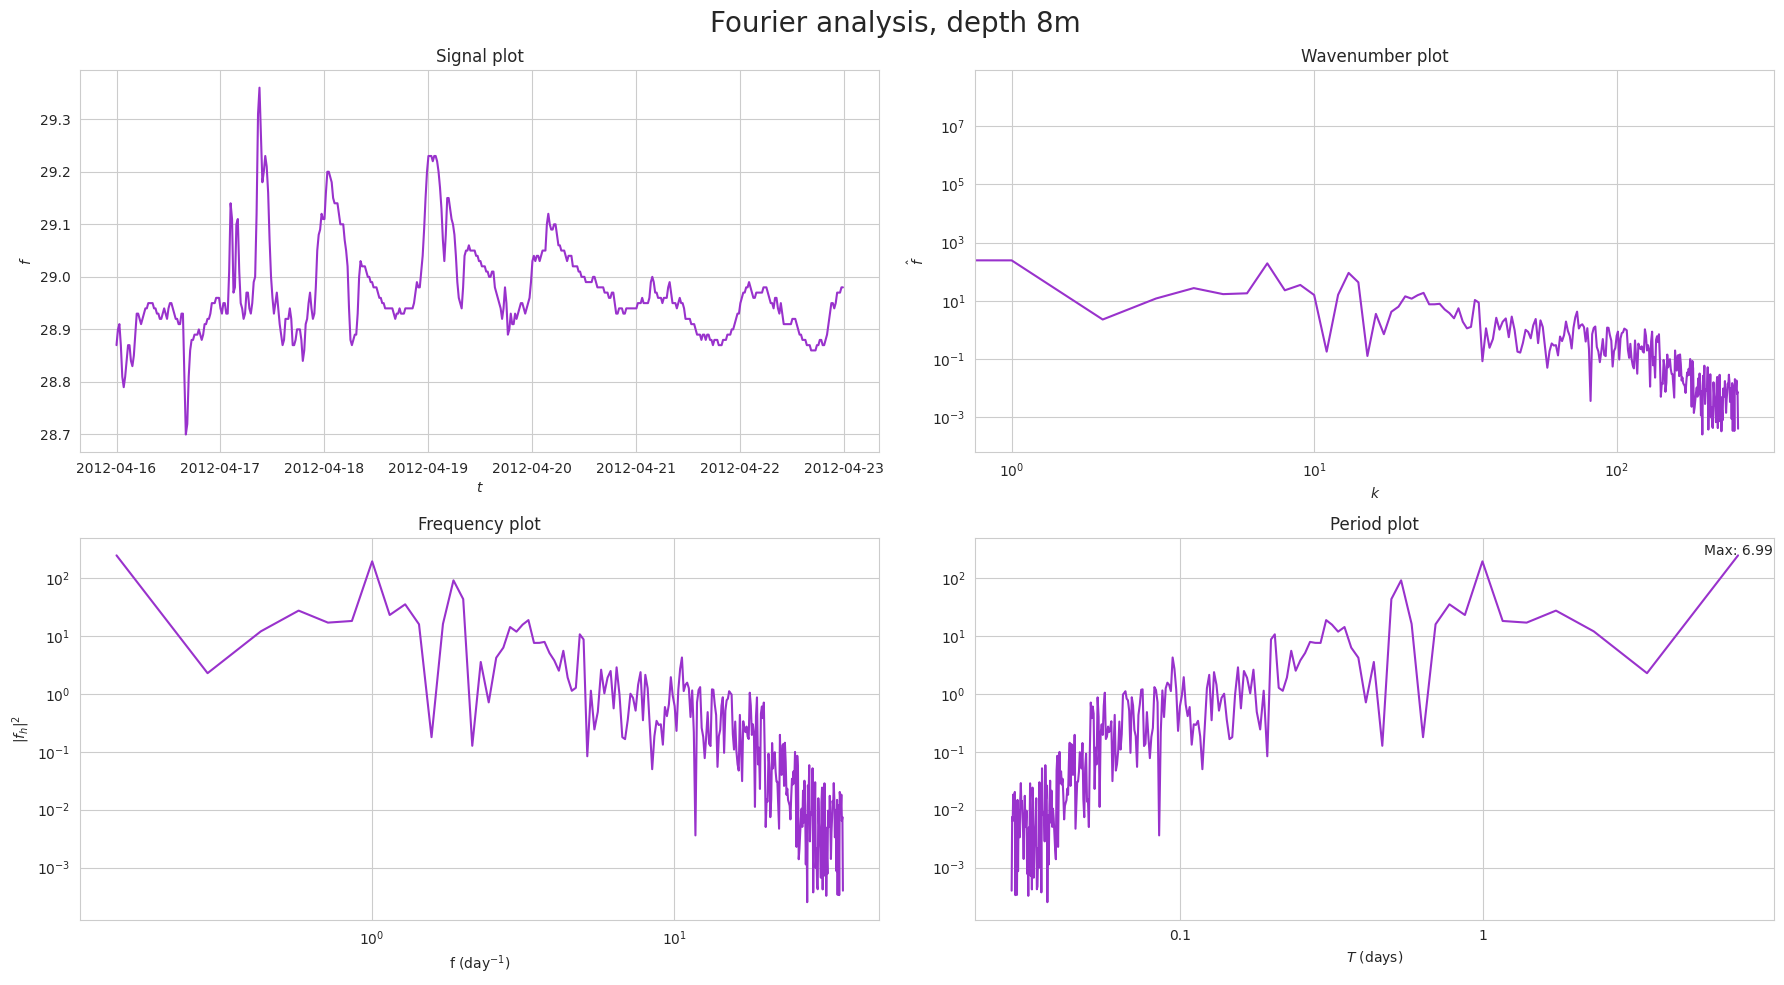

findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.


findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.


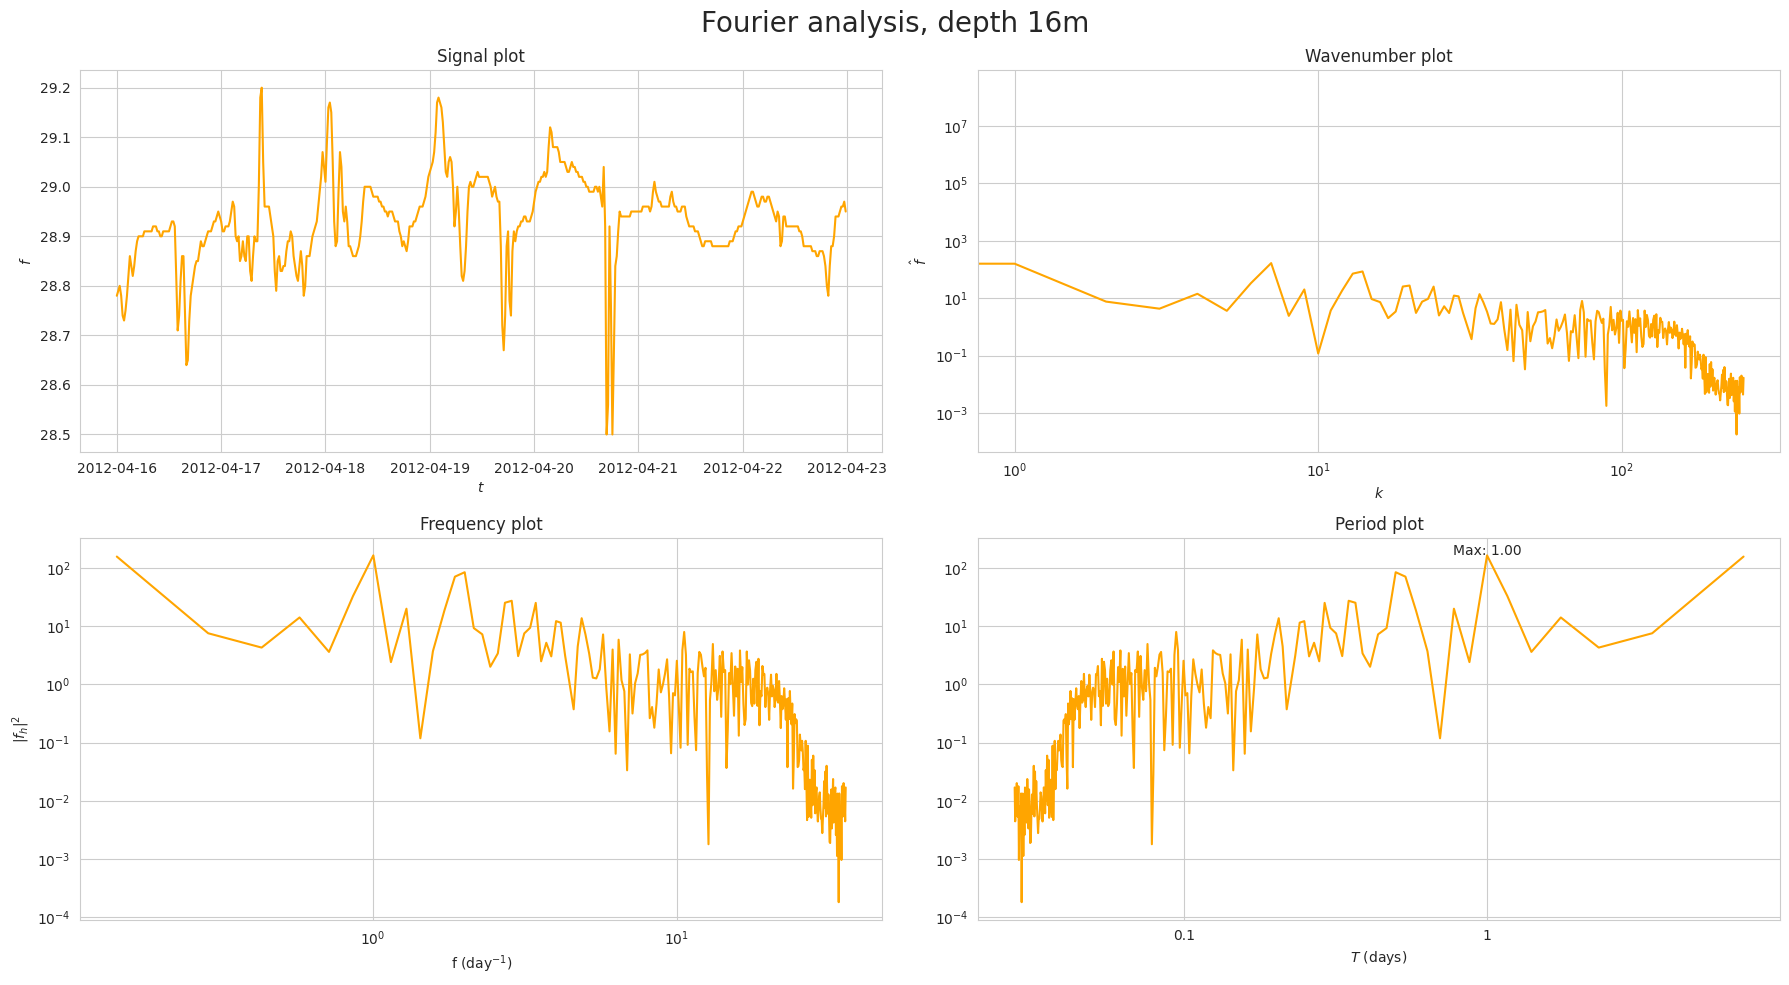

In [29]:
filtered_dfs=[filtered_8,filtered_14,filtered_16]
for data,color,depth in zip(filtered_dfs,colors,depths):
    plot_fourier(data,color,depth)

Spring/neap tides are very noticeable, but in this site diurnal and semi-diurnal tides are very strong, though it remains unclear whether that has to do with it being a different site, or with the absence of a strong *el niño*.

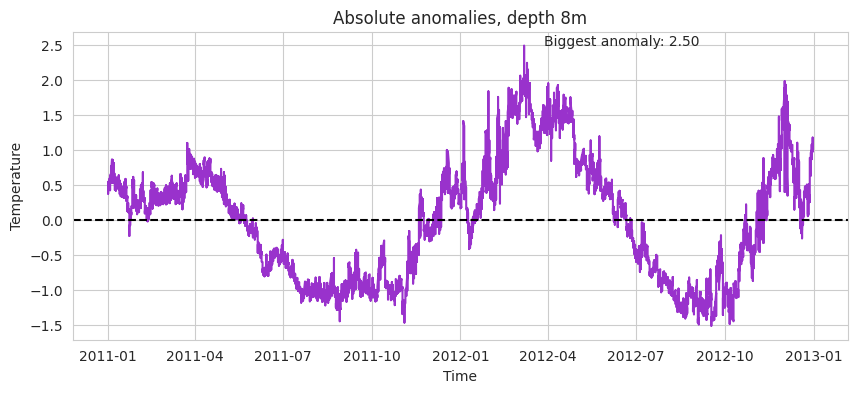

findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.


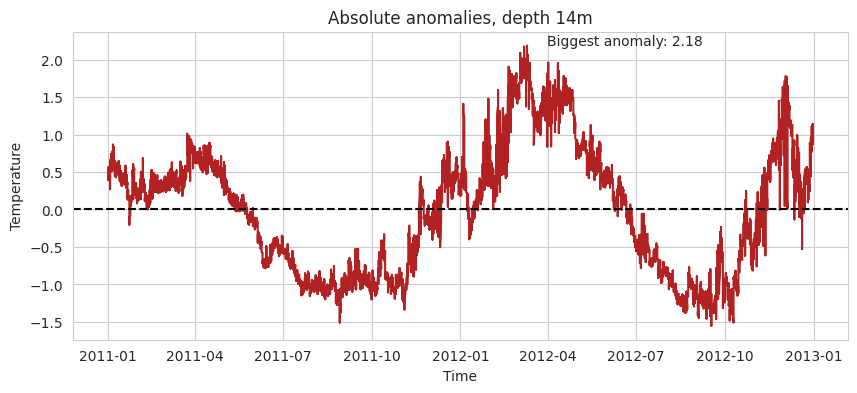

findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.


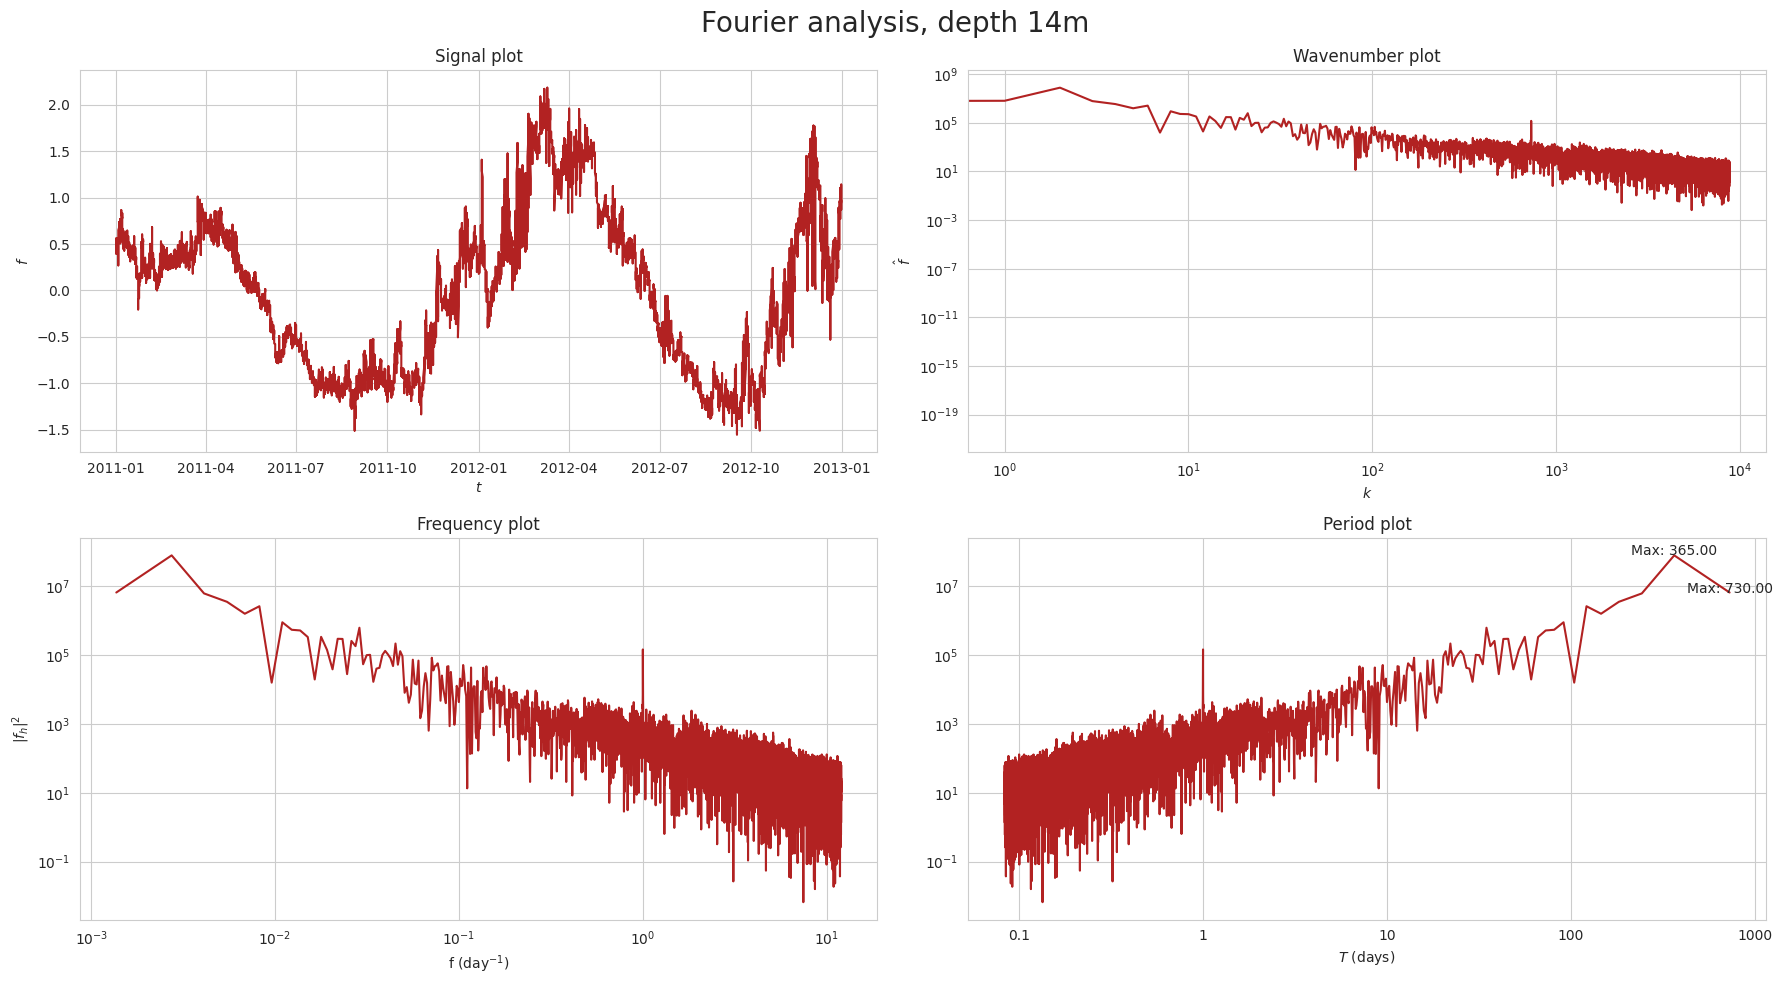

findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.
findfont: Font family 'times new roman' not found.


In [30]:
for data,color,depth in zip (new_datasets,colors,depths): 
    detrender(data,color,depth)

The anomalies are much smaller here, meaning that variance in temperatures was smaller in the original signals, again an indication of the difference *el niño* made in 2015-2016. Another thing of note is that on all 3 depths, the 730 day wave is noticeable, this could maybe be a regular *el niño*, as maybe different latitudes experience the phenomena with different frequencies.

# Conclusions

We saw possible effects of climate change/global warming in ocean temperatures, aswell as the huge consequences of the extreme 2015-2016 *el niño*. Through Fourier transforms analysis, we observed the occurrence of different tides , aswell as the wave representation of the aforementioned climate change and *el niño*. We also explored the differences between sites, how they differ in their tides, and how they perceive events like *el niño* differently. Most importantly, we observed that balance in ocean ecosystems has plenty of factors regulating it, and a slight change in a few of them can have great consequences, but, as always, more research is needed to better understand ocean ecosystems, and better discern and comprehend the effects of *el niño* and climate change.

## References & bibliography
Hendershott & Garrett (2007) Lecture 06: internal tides. Retrieved from: https://www.whoi.edu/cms/files/lecture06_21377.pdf
<br>Gao, Z., & Zhenzhong, G. (1998). Deep-water traction current deposits: a study of internal tides, internal waves, contour currents and their deposits. Science Press.
<br>Wyatt, A. S., Leichter, J. J., Toth, L. T., Miyajima, T., Aronson, R. B., & Nagata, T. (2020). Heat accumulation on coral reefs mitigated by internal waves. Nature Geoscience, 13(1), 28-34.
<br>Wolanski, E. (2018). Physical oceanographic processes of the Great Barrier Reef. CRC Press.
<br>D'Aleo, J. S., & Grube, P. G. (2002). Oryx resource guide to El Niño and La Niña.
<br>Mak, J. (2022) OCES 2003: Descriptive Physichal Oceanography. Lecture 18: Dynamics 4 (tides)
<br>National Oceanic and Atmospheric Administration (2023) In what types of water do corals live?. National Ocean Service. Retrieved from: https://oceanservice.noaa.gov/facts/coralwaters.html
<br>Berkeley Earth, Kaggle, Sissener, K. (2016) Climate Change: Earth Surface Temperature Data. Kaggle. https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/data
<br>National Oceanic and Atmospheric Administration (2010) What are El Niño and La Niña?. National Ocean Service. Retrieved from: https://oceanservice.noaa.gov/facts/ninonina.html
<br> Stockdale, T.;Balmaseda, M.;Ferranti, L. (2017)The 2015/2016 El Niño and beyond.European Centre for Medium-Range Weather Forecasts. Retrieved from: https://www.ecmwf.int/en/newsletter/151/meteorology/2015-2016-el-nino-and-beyond
<br>National Oceanic and Atmospheric Administration (2012) What are spring and neap tides?. Retrieved from:https://oceanservice.noaa.gov/facts/springtide.html
<br>Moorea Coral Reef LTER and L. Washburn. 2019. MCR LTER: Coral Reef: Temperature and Salinity subset of moorings FOR01, FOR04 and FOR05 from 2005-2014 ver 5. Environmental Data Initiative. https://doi.org/10.6073/pasta/6a506c7e46d737304468e960ddbc1303
<br>